In [1]:
# imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# me defined 
from dataloader import DatasetGenerator as dg
from modeling import ModelBuilder as mbuilder
from evaluation import Evaluator as ev

In [2]:
# check if running on gpu
if tf.config.list_physical_devices('GPU'):
    print("Running on GPU")
else:
    print("Running on CPU")

Running on GPU


Synthetic Data

In [3]:
# 4 input values, each Gaussian distributed with 0 mean and 1 stdev
# 1 output value, distance from the origin, AKA L2-norm
# 1000 instances for training, 1000 for testing

In [6]:
# finding alpha
def trial_run(alpha):
    """
    Run a training and validation with the alpha value passed
    
    
    :param alpha: dense weighting factor alpha
    :return: validation loss
    """

    # Generate synthetic data
    n_train = 1000
    n_test = 1000
    loader = dg(n_train, n_test, alpha=alpha)

    mb = mbuilder()
    
    eva = ev()

    # Create and train the model
    hiddens = [64, 32, 8]
    model = mb.create_model_feat(4, 2, hiddens)
    # summarize and plot the model
    # model.summary()

    history = mb.train_features(
        model, 
        loader.X_train, 
        loader.y_train, 
        loader.X_val,
        loader.y_val,
        learning_rate=1e-3, 
        epochs=400, batch_size=16)

    # plot_feature_space(model, X_train, y_train)
    # Plot the 2D feature space
    # eva.plot_feature_space(model, loader.X_train, loader.y_train)
    # eva.plot_feature_space(model, loader.X_test, loader.y_test)
    # add regression head
    extended_model = mb.add_regression_head(model)
    # train now with the regression stage with balanced loss
    history = mb.train_regression(
        extended_model, 
        loader.X_train, 
        loader.y_train, 
        loader.X_val,
        loader.y_val,
        loader.reweights, 
        loader.val_reweights,
        learning_rate=1e-4,
        epochs=400, batch_size=16)
    # get the val mse
    val_mse = eva.evaluate(extended_model, loader.X_val, loader.y_val)

    return val_mse

alpha value 0.0
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 10s 185ms/step - loss: 0.5640 - val_loss: 0.0272
Epoch 2/400
47/47 [==============================] - 8s 169ms/step - loss: 0.1632 - val_loss: 0.0258
Epoch 3/400
47/47 [==============================] - 8s 169ms/step - loss: 0.1722 - val_loss: 0.0297
Epoch 4/400
47/47 [==============================] - 8s 162ms/step - loss: 0.1656 - val_loss: 0.0356
Epoch 5/400
47/47 [==============================] - 8s 175ms/step - loss: 0.1691 - val_loss: 0.0274
Epoch 6/400
47/47 [==============================] - 8s 179ms/step - loss: 0.1600 - val_loss: 0.0289
Epoch 7/400
47/47 [==============================] - 8s 171ms/step - loss: 0.1522 - val_loss: 0.0424
Epoch 8/400
47/47 [==============================] - 8s 171ms/step - loss: 0.1561 - val_loss: 0.0258
Epoch 9/400
47/47 [==============================] - 8s 171ms/step - loss: 0.1625 - val_loss: 0.0234
Epoch 10/400
47/47 [=

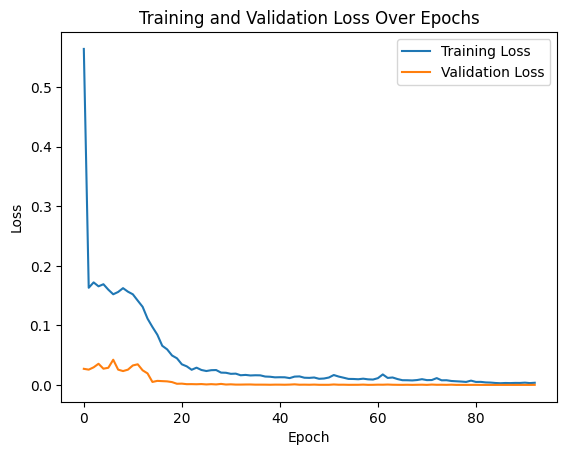

Epoch 1/84
63/63 [==============================] - 14s 201ms/step - loss: 0.0118
Epoch 2/84
63/63 [==============================] - 11s 167ms/step - loss: 0.0059
Epoch 3/84
63/63 [==============================] - 10s 165ms/step - loss: 0.0092
Epoch 4/84
63/63 [==============================] - 10s 156ms/step - loss: 0.0088
Epoch 5/84
63/63 [==============================] - 10s 151ms/step - loss: 0.0065
Epoch 6/84
63/63 [==============================] - 9s 149ms/step - loss: 0.0039
Epoch 7/84
63/63 [==============================] - 9s 146ms/step - loss: 0.0052
Epoch 8/84
63/63 [==============================] - 9s 146ms/step - loss: 0.0035
Epoch 9/84
63/63 [==============================] - 9s 143ms/step - loss: 0.0045
Epoch 10/84
63/63 [==============================] - 9s 146ms/step - loss: 0.0056
Epoch 11/84
63/63 [==============================] - 9s 142ms/step - loss: 0.0039
Epoch 12/84
63/63 [==============================] - 9s 145ms/step - loss: 0.0033
Epoch 13/84
63/63 [=

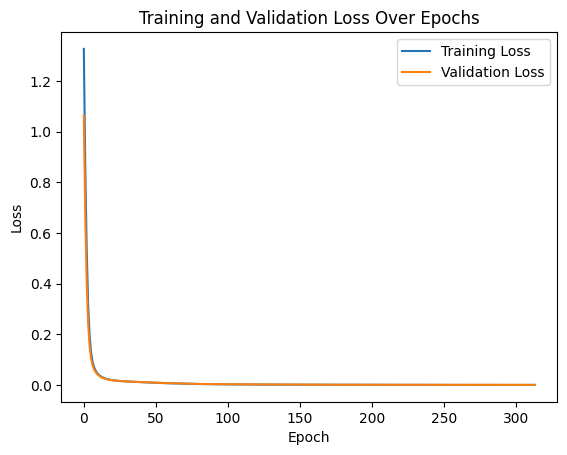

Epoch 1/305
63/63 [==============================] - 0s 7ms/step - loss: 2.2257e-04 - regression_head_loss: 2.2257e-04
Epoch 2/305
63/63 [==============================] - 0s 6ms/step - loss: 2.3928e-04 - regression_head_loss: 2.3928e-04
Epoch 3/305
63/63 [==============================] - 0s 5ms/step - loss: 2.2435e-04 - regression_head_loss: 2.2435e-04
Epoch 4/305
63/63 [==============================] - 0s 5ms/step - loss: 2.0998e-04 - regression_head_loss: 2.0998e-04
Epoch 5/305
63/63 [==============================] - 0s 6ms/step - loss: 2.0203e-04 - regression_head_loss: 2.0203e-04
Epoch 6/305
63/63 [==============================] - 0s 5ms/step - loss: 1.9861e-04 - regression_head_loss: 1.9861e-04
Epoch 7/305
63/63 [==============================] - 0s 6ms/step - loss: 2.0016e-04 - regression_head_loss: 2.0016e-04
Epoch 8/305
63/63 [==============================] - 0s 6ms/step - loss: 2.1721e-04 - regression_head_loss: 2.1721e-04
Epoch 9/305
63/63 [=============================

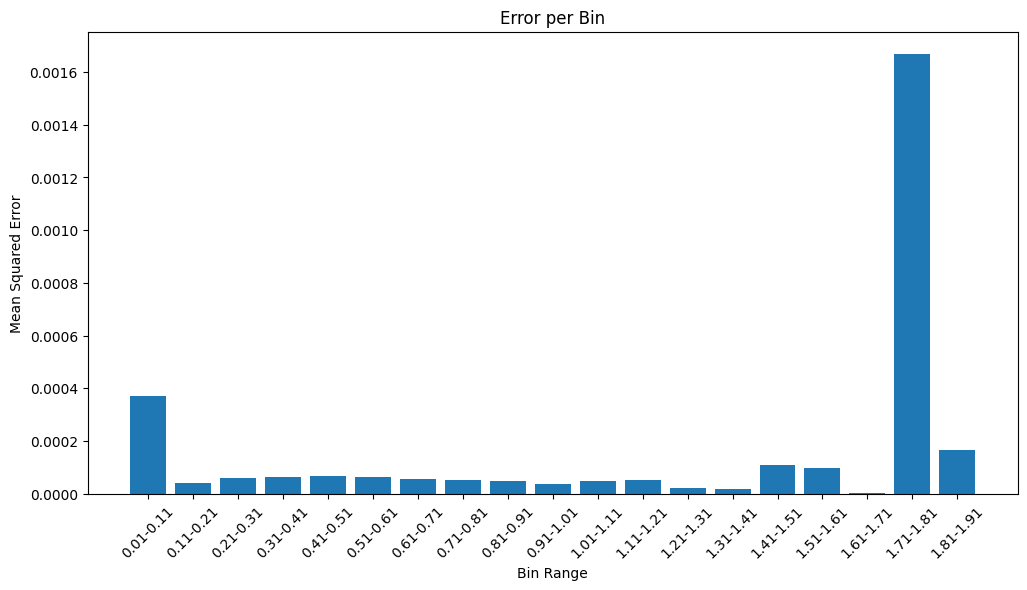

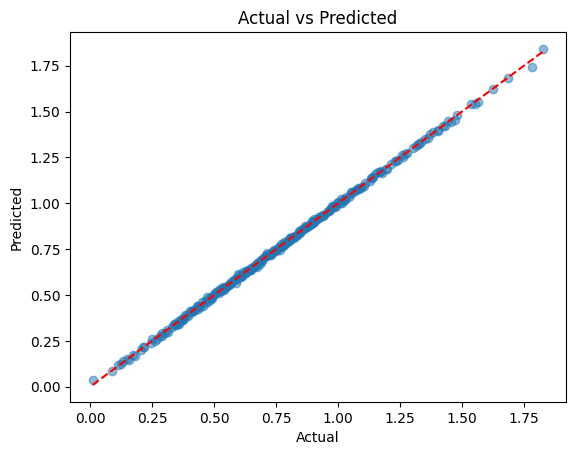

Sample with y = 0.6728805707053739 belongs to bin 7 and has an error of 0.0196658180312711
Sample with y = 1.473321681781767 belongs to bin 15 and has an error of 0.021140104099271806
Sample with y = 0.5893189741075904 belongs to bin 6 and has an error of 0.02298818358787602
Sample with y = 0.009744572974965908 belongs to bin 1 and has an error of 0.0264577385408422
Sample with y = 1.782925848130211 belongs to bin 18 and has an error of 0.040872577790245224
alpha value 0.1
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 10s 175ms/step - loss: 0.1912 - val_loss: 0.0027
Epoch 2/400
47/47 [==============================] - 8s 171ms/step - loss: 0.1301 - val_loss: 0.0155
Epoch 3/400
47/47 [==============================] - 8s 172ms/step - loss: 0.1278 - val_loss: 0.0151
Epoch 4/400
47/47 [==============================] - 8s 171ms/step - loss: 0.1240 - val_loss: 0.0211
Epoch 5/400
47/47 [==============================] - 8s 173ms/st

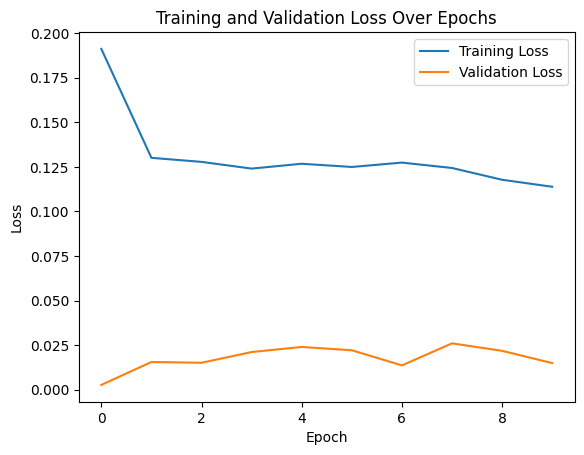

63/63 [==============================] - 11s 159ms/step - loss: 0.1402
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 12ms/step - loss: 3.7719 - regression_head_loss: 3.7719 - val_loss: 3.5992 - val_regression_head_loss: 3.5992
Epoch 2/400
47/47 [==============================] - 0s 8ms/step - loss: 3.1960 - regression_head_loss: 3.1960 - val_loss: 2.6152 - val_regression_head_loss: 2.6152
Epoch 3/400
47/47 [==============================] - 0s 8ms/step - loss: 1.7920 - regression_head_loss: 1.7920 - val_loss: 1.1203 - val_regression_head_loss: 1.1203
Epoch 4/400
47/47 [==============================] - 0s 7ms/step - loss: 0.6144 - regression_head_loss: 0.6144 - val_loss: 0.3693 - val_regression_head_loss: 0.3693
Epoch 5/400
47/47 [==============================] - 0s 7ms/step - loss: 0.3194 - regression_head_loss: 0.3194 - val_loss: 0.2940 - val_regression_head_loss: 0.2940
Epoch 6/400
47/47 [==============================]

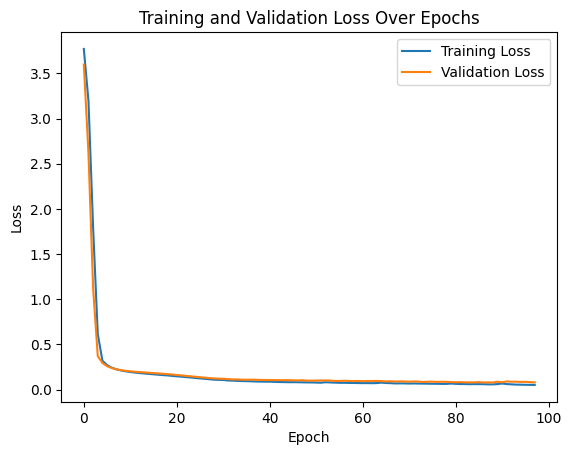

Epoch 1/89
63/63 [==============================] - 0s 5ms/step - loss: 0.0616 - regression_head_loss: 0.0616
Epoch 2/89
63/63 [==============================] - 0s 6ms/step - loss: 0.0613 - regression_head_loss: 0.0613
Epoch 3/89
63/63 [==============================] - 0s 6ms/step - loss: 0.0602 - regression_head_loss: 0.0602
Epoch 4/89
63/63 [==============================] - 0s 6ms/step - loss: 0.0572 - regression_head_loss: 0.0572
Epoch 5/89
63/63 [==============================] - 0s 6ms/step - loss: 0.0563 - regression_head_loss: 0.0563
Epoch 6/89
63/63 [==============================] - 0s 6ms/step - loss: 0.0553 - regression_head_loss: 0.0553
Epoch 7/89
63/63 [==============================] - 0s 6ms/step - loss: 0.0539 - regression_head_loss: 0.0539
Epoch 8/89
63/63 [==============================] - 0s 6ms/step - loss: 0.0522 - regression_head_loss: 0.0522
Epoch 9/89
63/63 [==============================] - 0s 6ms/step - loss: 0.0502 - regression_head_loss: 0.0502
Epoch 10/8

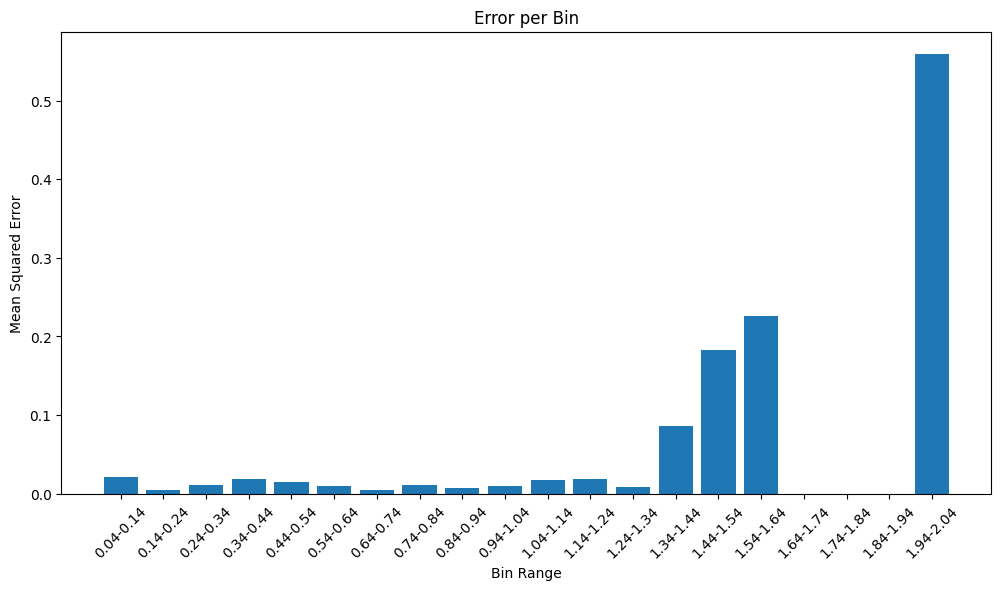

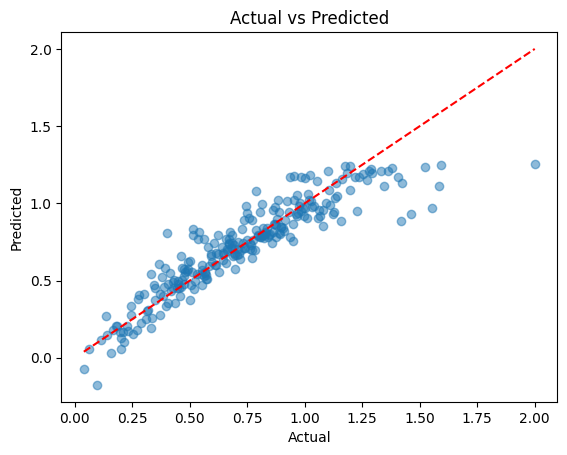

Sample with y = 1.5845759539702369 belongs to bin 16 and has an error of 0.4711938529112769
Sample with y = 1.4622298719060731 belongs to bin 15 and has an error of 0.5306762100828004
Sample with y = 1.419620643341745 belongs to bin 14 and has an error of 0.5333203179480683
Sample with y = 1.5541821674957952 belongs to bin 16 and has an error of 0.58287536665351
Sample with y = 2.0 belongs to bin 20 and has an error of 0.7481341361999512
alpha value 0.2
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 10s 176ms/step - loss: 0.4375 - val_loss: 4.3560e-04
Epoch 2/400
47/47 [==============================] - 8s 167ms/step - loss: 0.1067 - val_loss: 6.4783e-04
Epoch 3/400
47/47 [==============================] - 8s 171ms/step - loss: 0.1053 - val_loss: 0.0017
Epoch 4/400
47/47 [==============================] - 8s 166ms/step - loss: 0.1016 - val_loss: 0.0065
Epoch 5/400
47/47 [==============================] - 7s 157ms/step - loss: 0

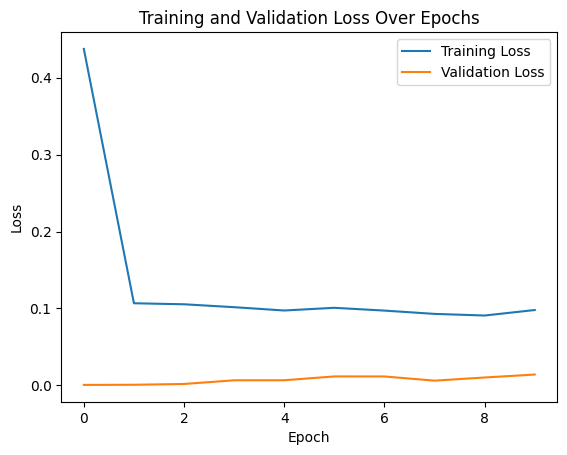

63/63 [==============================] - 10s 146ms/step - loss: 0.1017
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 14ms/step - loss: 0.1916 - regression_head_loss: 0.1916 - val_loss: 0.1506 - val_regression_head_loss: 0.1506
Epoch 2/400
47/47 [==============================] - 0s 9ms/step - loss: 0.1472 - regression_head_loss: 0.1472 - val_loss: 0.1276 - val_regression_head_loss: 0.1276
Epoch 3/400
47/47 [==============================] - 0s 8ms/step - loss: 0.1288 - regression_head_loss: 0.1288 - val_loss: 0.1170 - val_regression_head_loss: 0.1170
Epoch 4/400
47/47 [==============================] - 0s 8ms/step - loss: 0.1186 - regression_head_loss: 0.1186 - val_loss: 0.1099 - val_regression_head_loss: 0.1099
Epoch 5/400
47/47 [==============================] - 0s 7ms/step - loss: 0.1114 - regression_head_loss: 0.1114 - val_loss: 0.1055 - val_regression_head_loss: 0.1055
Epoch 6/400
47/47 [==============================]

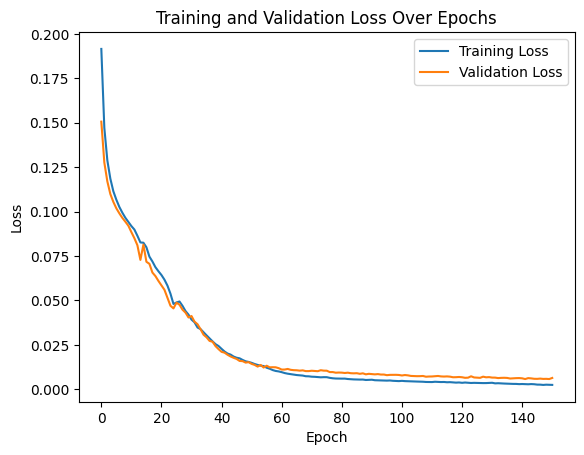

Epoch 1/142
63/63 [==============================] - 0s 7ms/step - loss: 0.0038 - regression_head_loss: 0.0038
Epoch 2/142
63/63 [==============================] - 0s 6ms/step - loss: 0.0036 - regression_head_loss: 0.0036
Epoch 3/142
63/63 [==============================] - 0s 5ms/step - loss: 0.0035 - regression_head_loss: 0.0035
Epoch 4/142
63/63 [==============================] - 0s 6ms/step - loss: 0.0033 - regression_head_loss: 0.0033
Epoch 5/142
63/63 [==============================] - 0s 7ms/step - loss: 0.0034 - regression_head_loss: 0.0034
Epoch 6/142
63/63 [==============================] - 0s 6ms/step - loss: 0.0032 - regression_head_loss: 0.0032
Epoch 7/142
63/63 [==============================] - 0s 5ms/step - loss: 0.0030 - regression_head_loss: 0.0030
Epoch 8/142
63/63 [==============================] - 0s 5ms/step - loss: 0.0030 - regression_head_loss: 0.0030
Epoch 9/142
63/63 [==============================] - 0s 5ms/step - loss: 0.0029 - regression_head_loss: 0.0029
E

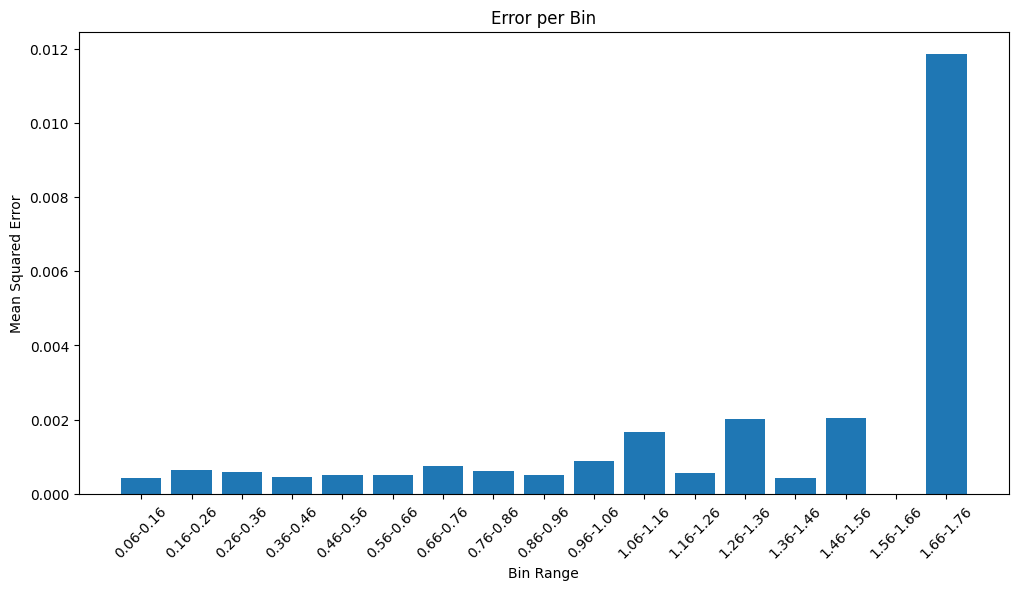

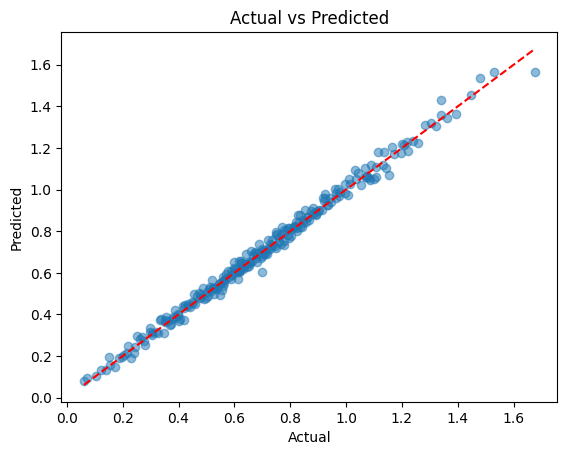

Sample with y = 1.1146147129606059 belongs to bin 11 and has an error of 0.06547607206594441
Sample with y = 1.15460408242741 belongs to bin 11 and has an error of 0.08680332215824493
Sample with y = 1.3392952888482939 belongs to bin 13 and has an error of 0.09227822132168906
Sample with y = 0.7000175014404446 belongs to bin 7 and has an error of 0.09563886078874173
Sample with y = 1.6760960670838962 belongs to bin 17 and has an error of 0.10896001781326636
alpha value 0.30000000000000004
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 10s 183ms/step - loss: 0.6304 - val_loss: 0.0298
Epoch 2/400
47/47 [==============================] - 8s 175ms/step - loss: 0.1434 - val_loss: 0.0255
Epoch 3/400
47/47 [==============================] - 8s 177ms/step - loss: 0.1443 - val_loss: 0.0252
Epoch 4/400
47/47 [==============================] - 8s 172ms/step - loss: 0.1446 - val_loss: 0.0176
Epoch 5/400
47/47 [=============================

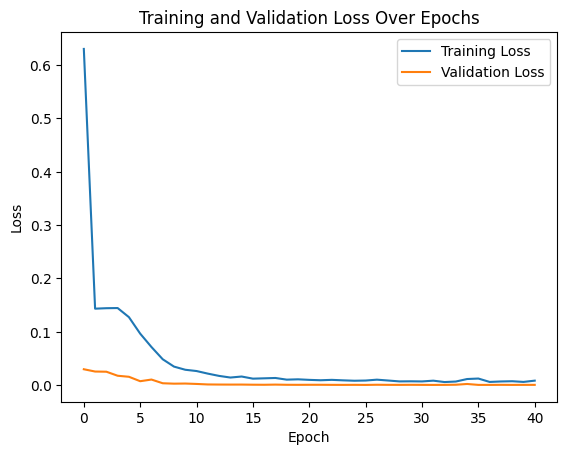

Epoch 1/32
63/63 [==============================] - 11s 151ms/step - loss: 0.0152
Epoch 2/32
63/63 [==============================] - 9s 148ms/step - loss: 0.0126
Epoch 3/32
63/63 [==============================] - 9s 147ms/step - loss: 0.0114
Epoch 4/32
63/63 [==============================] - 9s 148ms/step - loss: 0.0106
Epoch 5/32
63/63 [==============================] - 9s 148ms/step - loss: 0.0124
Epoch 6/32
63/63 [==============================] - 9s 147ms/step - loss: 0.0104
Epoch 7/32
63/63 [==============================] - 10s 151ms/step - loss: 0.0101
Epoch 8/32
63/63 [==============================] - 9s 148ms/step - loss: 0.0088
Epoch 9/32
63/63 [==============================] - 9s 148ms/step - loss: 0.0082
Epoch 10/32
63/63 [==============================] - 9s 147ms/step - loss: 0.0077
Epoch 11/32
63/63 [==============================] - 9s 148ms/step - loss: 0.0101
Epoch 12/32
63/63 [==============================] - 9s 147ms/step - loss: 0.0087
Epoch 13/32
63/63 [====

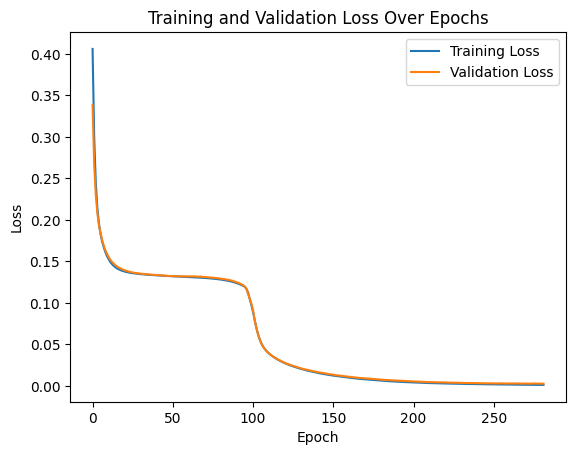

Epoch 1/273
63/63 [==============================] - 0s 5ms/step - loss: 0.0017 - regression_head_loss: 0.0017
Epoch 2/273
63/63 [==============================] - 0s 5ms/step - loss: 0.0016 - regression_head_loss: 0.0016
Epoch 3/273
63/63 [==============================] - 0s 5ms/step - loss: 0.0015 - regression_head_loss: 0.0015
Epoch 4/273
63/63 [==============================] - 0s 5ms/step - loss: 0.0015 - regression_head_loss: 0.0015
Epoch 5/273
63/63 [==============================] - 0s 5ms/step - loss: 0.0014 - regression_head_loss: 0.0014
Epoch 6/273
63/63 [==============================] - 0s 5ms/step - loss: 0.0014 - regression_head_loss: 0.0014
Epoch 7/273
63/63 [==============================] - 0s 5ms/step - loss: 0.0013 - regression_head_loss: 0.0013
Epoch 8/273
63/63 [==============================] - 0s 5ms/step - loss: 0.0013 - regression_head_loss: 0.0013
Epoch 9/273
63/63 [==============================] - 0s 5ms/step - loss: 0.0013 - regression_head_loss: 0.0013
E

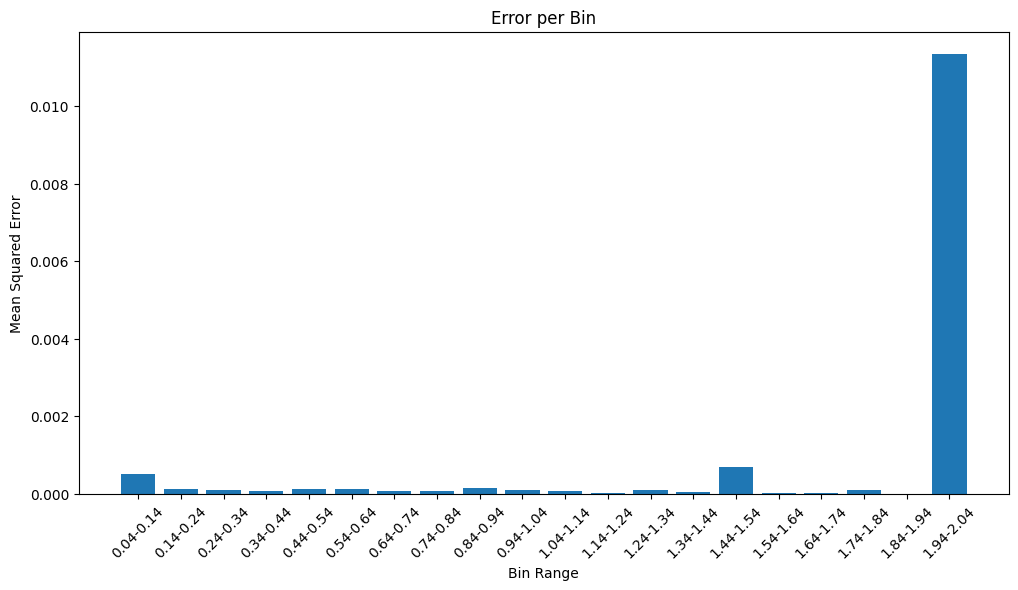

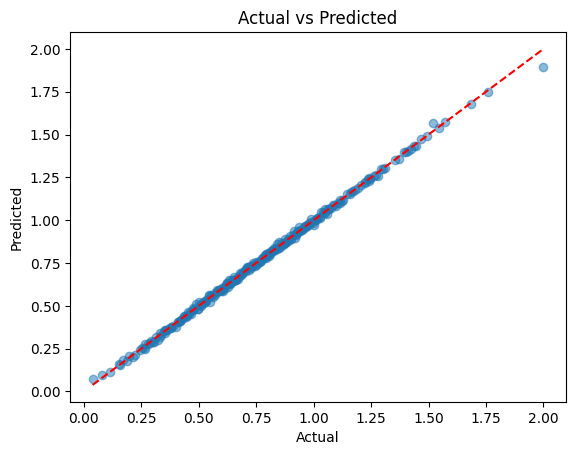

Sample with y = 0.5499596336457343 belongs to bin 6 and has an error of 0.028494391736707203
Sample with y = 1.0028163063861038 belongs to bin 10 and has an error of 0.029873715672602774
Sample with y = 0.03829395707420421 belongs to bin 1 and has an error of 0.03487604920097279
Sample with y = 1.5172116514794713 belongs to bin 15 and has an error of 0.05051543744875131
Sample with y = 2.0 belongs to bin 20 and has an error of 0.10653936862945557
alpha value 0.4
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 10s 173ms/step - loss: 1.3406 - val_loss: 0.0255
Epoch 2/400
47/47 [==============================] - 8s 168ms/step - loss: 0.1862 - val_loss: 0.0353
Epoch 3/400
47/47 [==============================] - 8s 170ms/step - loss: 0.1857 - val_loss: 0.0378
Epoch 4/400
47/47 [==============================] - 8s 164ms/step - loss: 0.1944 - val_loss: 0.0310
Epoch 5/400
47/47 [==============================] - 7s 154ms/step - loss: 

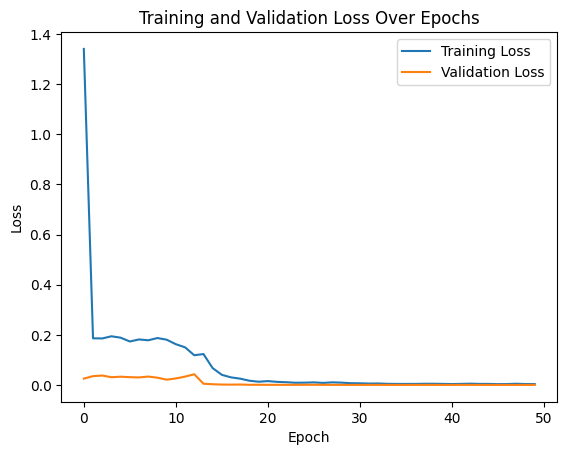

Epoch 1/41
63/63 [==============================] - 10s 147ms/step - loss: 0.0124
Epoch 2/41
63/63 [==============================] - 9s 142ms/step - loss: 0.0121
Epoch 3/41
63/63 [==============================] - 10s 157ms/step - loss: 0.0083
Epoch 4/41
63/63 [==============================] - 9s 149ms/step - loss: 0.0085
Epoch 5/41
63/63 [==============================] - 9s 144ms/step - loss: 0.0055
Epoch 6/41
63/63 [==============================] - 9s 147ms/step - loss: 0.0059
Epoch 7/41
63/63 [==============================] - 10s 151ms/step - loss: 0.0068
Epoch 8/41
63/63 [==============================] - 9s 147ms/step - loss: 0.0056
Epoch 9/41
63/63 [==============================] - 9s 147ms/step - loss: 0.0129
Epoch 10/41
63/63 [==============================] - 10s 159ms/step - loss: 0.0053
Epoch 11/41
63/63 [==============================] - 10s 158ms/step - loss: 0.0039
Epoch 12/41
63/63 [==============================] - 10s 166ms/step - loss: 0.0042
Epoch 13/41
63/63 [

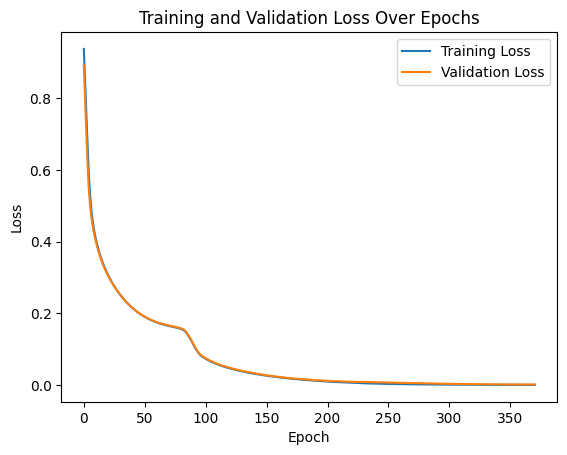

Epoch 1/362
63/63 [==============================] - 0s 6ms/step - loss: 9.6777e-04 - regression_head_loss: 9.6777e-04
Epoch 2/362
63/63 [==============================] - 0s 6ms/step - loss: 9.4908e-04 - regression_head_loss: 9.4908e-04
Epoch 3/362
63/63 [==============================] - 0s 6ms/step - loss: 8.9473e-04 - regression_head_loss: 8.9473e-04
Epoch 4/362
63/63 [==============================] - 0s 5ms/step - loss: 8.9725e-04 - regression_head_loss: 8.9725e-04
Epoch 5/362
63/63 [==============================] - 0s 6ms/step - loss: 8.9220e-04 - regression_head_loss: 8.9220e-04
Epoch 6/362
63/63 [==============================] - 0s 6ms/step - loss: 8.7681e-04 - regression_head_loss: 8.7681e-04
Epoch 7/362
63/63 [==============================] - 0s 7ms/step - loss: 8.9691e-04 - regression_head_loss: 8.9691e-04
Epoch 8/362
63/63 [==============================] - 1s 9ms/step - loss: 8.0595e-04 - regression_head_loss: 8.0595e-04
Epoch 9/362
63/63 [=============================

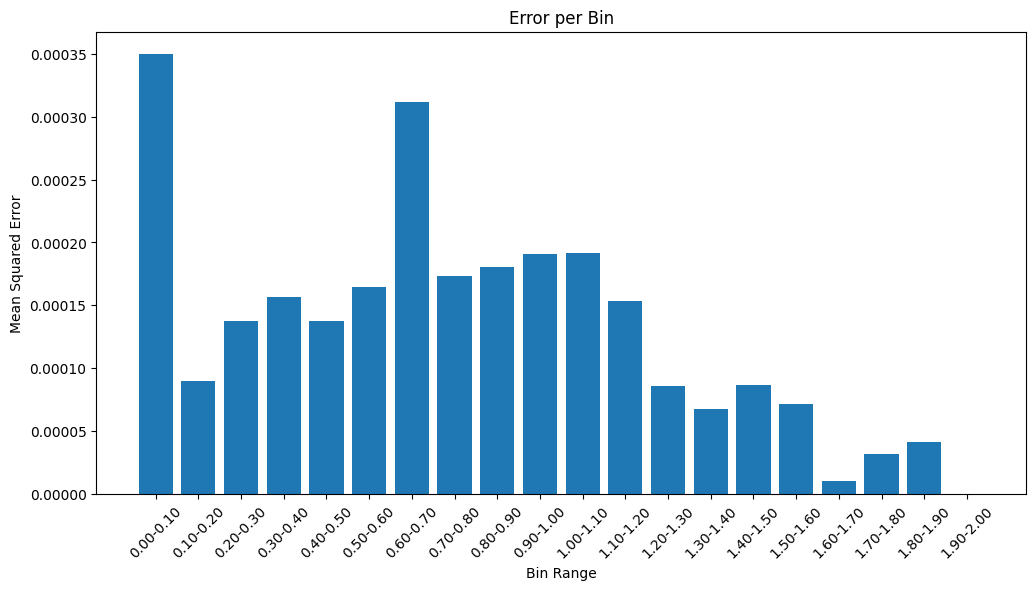

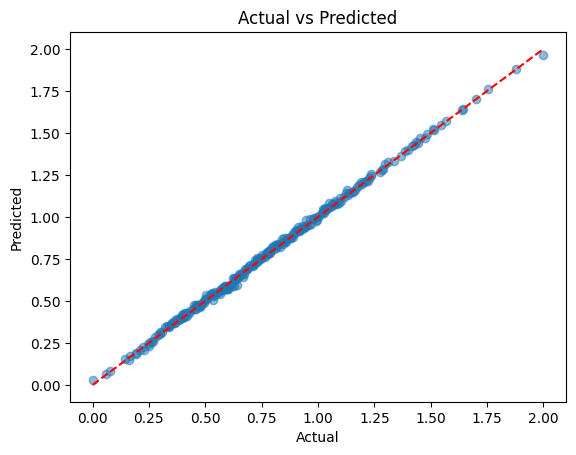

Sample with y = 1.1270295474310674 belongs to bin 12 and has an error of 0.03329216506282906
Sample with y = 2.0 belongs to bin 21 and has an error of 0.03484606742858887
Sample with y = 0.9455091906127684 belongs to bin 10 and has an error of 0.035169367736840984
Sample with y = 0.6260767931664141 belongs to bin 7 and has an error of 0.039425169917360114
Sample with y = 0.6396533929556963 belongs to bin 7 and has an error of 0.046864815875923393
alpha value 0.5
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 15s 270ms/step - loss: 0.6100 - val_loss: 0.0064
Epoch 2/400
47/47 [==============================] - 10s 208ms/step - loss: 0.1064 - val_loss: 0.0091
Epoch 3/400
47/47 [==============================] - 11s 238ms/step - loss: 0.1028 - val_loss: 0.0130
Epoch 4/400
47/47 [==============================] - 10s 207ms/step - loss: 0.1051 - val_loss: 0.0176
Epoch 5/400
47/47 [==============================] - 10s 205ms/step - lo

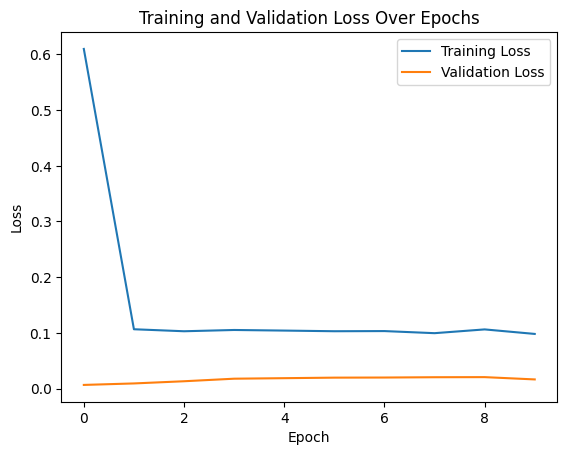

63/63 [==============================] - 15s 201ms/step - loss: 0.1063
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 4s 58ms/step - loss: 0.5629 - regression_head_loss: 0.5629 - val_loss: 0.5346 - val_regression_head_loss: 0.5346
Epoch 2/400
47/47 [==============================] - 4s 93ms/step - loss: 0.5111 - regression_head_loss: 0.5111 - val_loss: 0.4884 - val_regression_head_loss: 0.4884
Epoch 3/400
47/47 [==============================] - 5s 96ms/step - loss: 0.4716 - regression_head_loss: 0.4716 - val_loss: 0.4551 - val_regression_head_loss: 0.4551
Epoch 4/400
47/47 [==============================] - 8s 168ms/step - loss: 0.4439 - regression_head_loss: 0.4439 - val_loss: 0.4334 - val_regression_head_loss: 0.4334
Epoch 5/400
47/47 [==============================] - 4s 76ms/step - loss: 0.4259 - regression_head_loss: 0.4259 - val_loss: 0.4194 - val_regression_head_loss: 0.4194
Epoch 6/400
47/47 [==========================

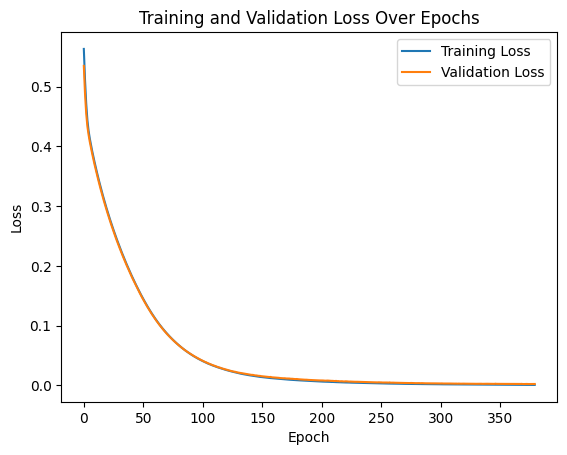

Epoch 1/371
63/63 [==============================] - 2s 34ms/step - loss: 0.0015 - regression_head_loss: 0.0015
Epoch 2/371
63/63 [==============================] - 1s 21ms/step - loss: 0.0015 - regression_head_loss: 0.0015
Epoch 3/371
63/63 [==============================] - 3s 45ms/step - loss: 0.0012 - regression_head_loss: 0.0012
Epoch 4/371
63/63 [==============================] - 2s 39ms/step - loss: 0.0012 - regression_head_loss: 0.0012
Epoch 5/371
63/63 [==============================] - 3s 49ms/step - loss: 0.0012 - regression_head_loss: 0.0012
Epoch 6/371
63/63 [==============================] - 1s 17ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 7/371
63/63 [==============================] - 1s 16ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 8/371
63/63 [==============================] - 1s 22ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 9/371
63/63 [==============================] - 2s 34ms/step - loss: 0.0011 - regression_head_loss:

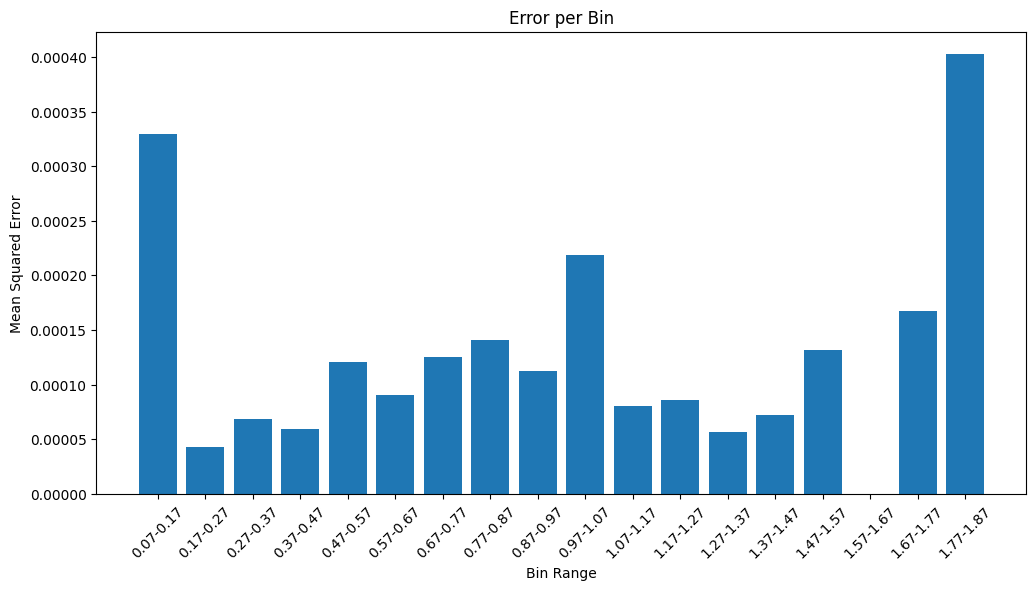

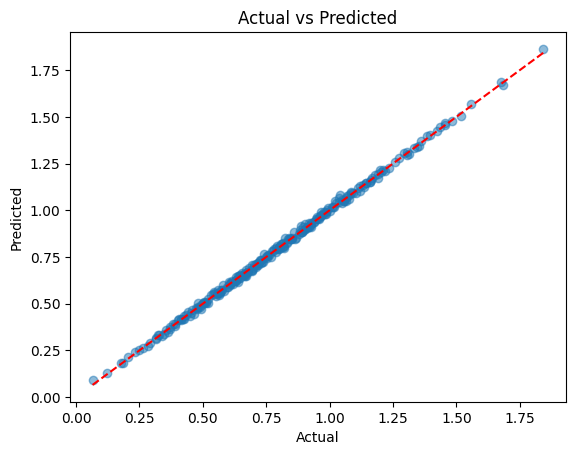

Sample with y = 1.0380576273527353 belongs to bin 10 and has an error of 0.02590936216447659
Sample with y = 1.0220903808161703 belongs to bin 10 and has an error of 0.028006131024649994
Sample with y = 0.8238213884910375 belongs to bin 8 and has an error of 0.028182841531392944
Sample with y = 0.8854206978999313 belongs to bin 9 and has an error of 0.031478267935640014
Sample with y = 1.0425209688582542 belongs to bin 10 and has an error of 0.041472227629172576
alpha value 0.6000000000000001
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 10s 183ms/step - loss: 0.6482 - val_loss: 0.0128
Epoch 2/400
47/47 [==============================] - 8s 175ms/step - loss: 0.1588 - val_loss: 0.0268
Epoch 3/400
47/47 [==============================] - 8s 169ms/step - loss: 0.1609 - val_loss: 0.0253
Epoch 4/400
47/47 [==============================] - 8s 175ms/step - loss: 0.1603 - val_loss: 0.0254
Epoch 5/400
47/47 [=========================

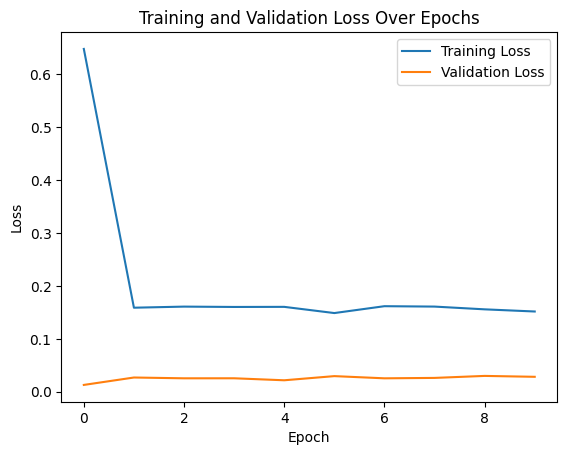

63/63 [==============================] - 12s 171ms/step - loss: 0.1667
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 2s 13ms/step - loss: 4.0863 - regression_head_loss: 4.0863 - val_loss: 3.8071 - val_regression_head_loss: 3.8071
Epoch 2/400
47/47 [==============================] - 0s 8ms/step - loss: 3.2715 - regression_head_loss: 3.2715 - val_loss: 2.6985 - val_regression_head_loss: 2.6985
Epoch 3/400
47/47 [==============================] - 0s 8ms/step - loss: 2.0379 - regression_head_loss: 2.0379 - val_loss: 1.5703 - val_regression_head_loss: 1.5703
Epoch 4/400
47/47 [==============================] - 0s 7ms/step - loss: 1.1230 - regression_head_loss: 1.1230 - val_loss: 0.9265 - val_regression_head_loss: 0.9265
Epoch 5/400
47/47 [==============================] - 0s 8ms/step - loss: 0.5723 - regression_head_loss: 0.5723 - val_loss: 0.4865 - val_regression_head_loss: 0.4865
Epoch 6/400
47/47 [==============================]

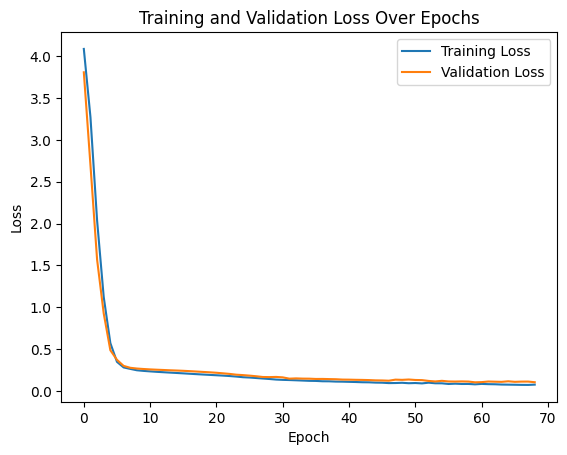

Epoch 1/60
63/63 [==============================] - 0s 5ms/step - loss: 0.0862 - regression_head_loss: 0.0862
Epoch 2/60
63/63 [==============================] - 0s 5ms/step - loss: 0.0861 - regression_head_loss: 0.0861
Epoch 3/60
63/63 [==============================] - 0s 5ms/step - loss: 0.0833 - regression_head_loss: 0.0833
Epoch 4/60
63/63 [==============================] - 0s 5ms/step - loss: 0.0828 - regression_head_loss: 0.0828
Epoch 5/60
63/63 [==============================] - 0s 6ms/step - loss: 0.0787 - regression_head_loss: 0.0787
Epoch 6/60
63/63 [==============================] - 0s 5ms/step - loss: 0.0771 - regression_head_loss: 0.0771
Epoch 7/60
63/63 [==============================] - 0s 6ms/step - loss: 0.0756 - regression_head_loss: 0.0756
Epoch 8/60
63/63 [==============================] - 0s 5ms/step - loss: 0.0755 - regression_head_loss: 0.0755
Epoch 9/60
63/63 [==============================] - 0s 6ms/step - loss: 0.0733 - regression_head_loss: 0.0733
Epoch 10/6

In [ ]:
# search alpha from 0 to 1.5 at .1 increments 
best_error, best_alpha = np.inf, 0
for alpha in np.arange(0, 1.6, 0.1):
    print(f'alpha value {alpha}')
    res = trial_run(alpha)
    if res < best_error:
        best_error = res
        best_alpha = alpha
        
print(f'best alpha {best_alpha}, best error {best_error}')
    

(1000,)
min_val y in before norm:  0.30336393039835013
max_val y in before norm:  4.602297725798119
(1000,)
min_val y in before norm:  0.2292676773559074
max_val y in before norm:  4.752819850356652


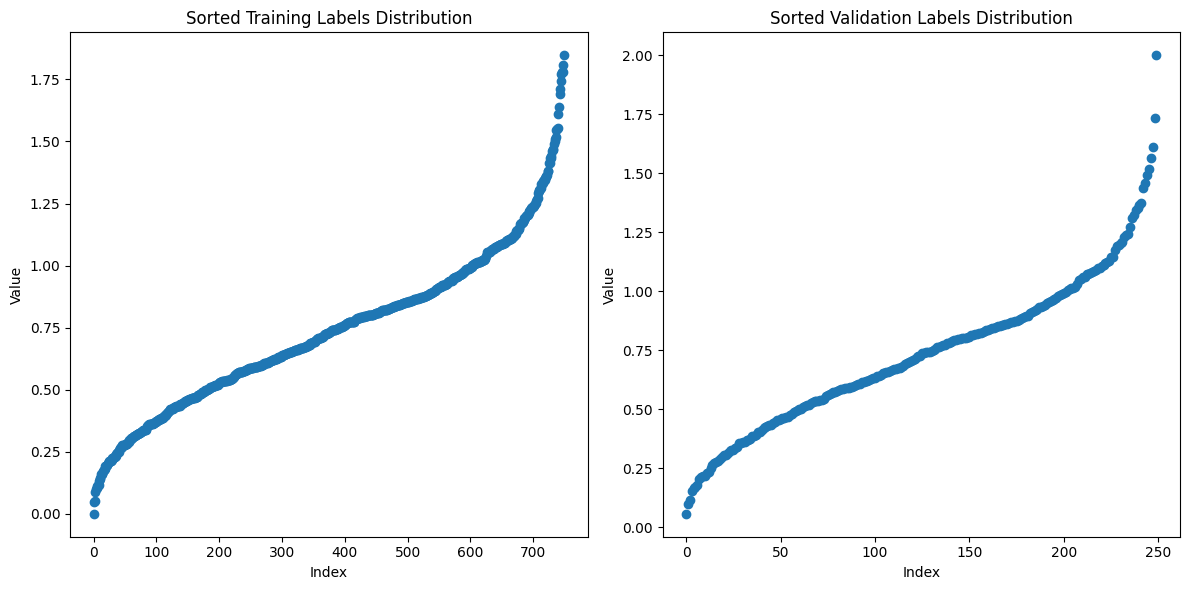

X_train:  [[-0.62246223  0.37896541  0.21532772 -2.16766725]
 [ 0.50407224 -1.44429391 -1.31738916  0.12623662]
 [-0.22978148  1.18858544  2.19576143  0.97595628]
 [-1.14883365  0.98882227 -0.71678588 -0.12967708]
 [-1.69861637 -0.93105842  0.02002657  1.48129898]
 [ 0.40211501  0.59275706 -0.50991036 -0.22049538]
 [ 0.44028985 -0.11207012 -0.1546883   0.28030167]
 [-0.37405381 -0.83444779  1.29430155 -1.35414339]
 [ 1.67955003  2.03392997  0.36869044  0.23041094]
 [-0.53239869  0.13008385  1.52273453 -1.05225906]
 [-2.58664602 -0.01454441 -0.37231966 -1.26076598]
 [ 1.38762586  1.3406884  -0.05532299 -0.61273053]]
Validation X: [[-0.89592699  3.11393197 -0.65646787  3.20170842]
 [ 0.66104885  2.40149081  1.95706127 -2.48936725]
 [-2.10163958 -2.47100594  1.90285098  0.12385374]
 [ 2.02124241 -0.60490302  2.90250703 -0.75928997]
 [-2.82907244  1.91014557  0.23055476 -1.01569873]
 [ 1.67124521  2.53629347 -0.51551679 -1.69204259]
 [-0.52082416  1.60424746  2.99078118 -0.18376957]
 [-1.3

In [3]:
# Generate synthetic data
n_train = 1000
n_test = 1000
loader = dg(n_train, n_test)
print(loader.min_y, loader.max_y)

Model Building

In [5]:
# NN for representation learning:
# 4 input nodes
# 1 or more hidden layers
# the last hidden layer has 2 nodes (representation layer Z)
# plot the instances in the 2D feature/representation space of Z 
# use different colors for different target values (can be in groups, each group with a different color) similar to the RankSim pictures
# training and test sets in different plots.
# expecting the instances to be in a semi-circle
# for prediction, add output layer of 1 node.

mb = mb()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 64)                320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 32)                0     

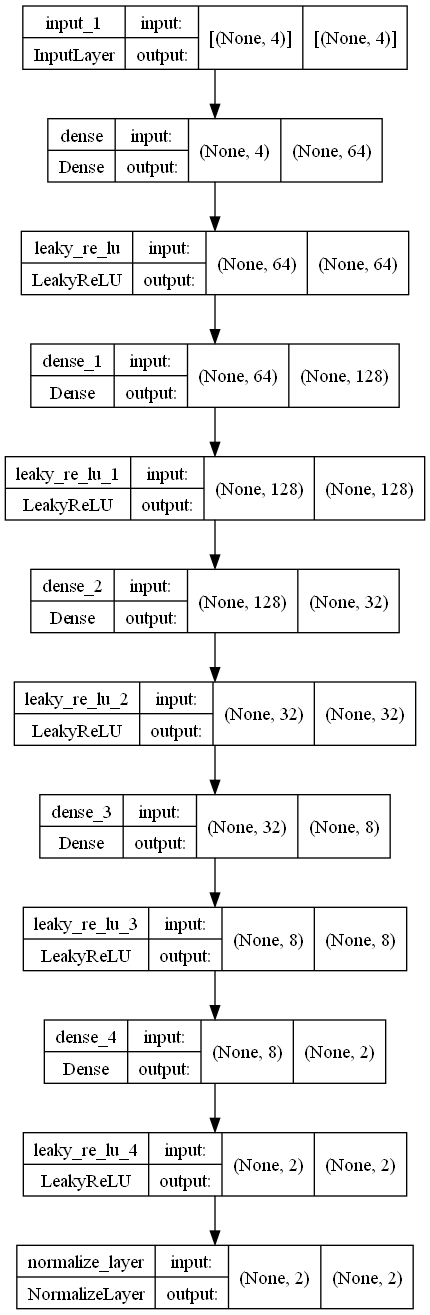

In [6]:
# Create and train the model
hiddens = [64, 32, 8]
model = mb.create_model_feat(4, 2, hiddens)
# summarize and plot the model
model.summary()

Test of First Idea improving on ranksim

In [7]:
eva = ev()

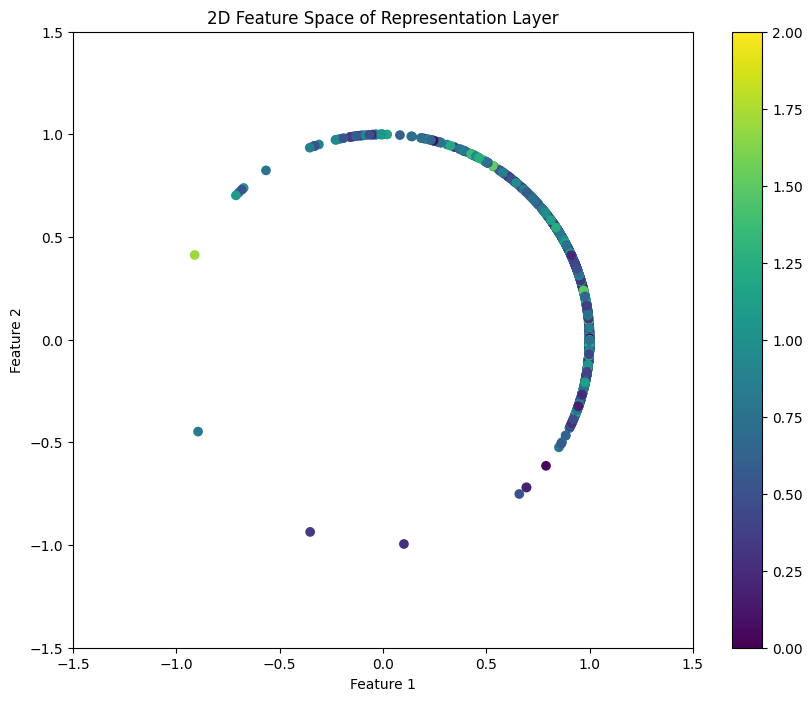

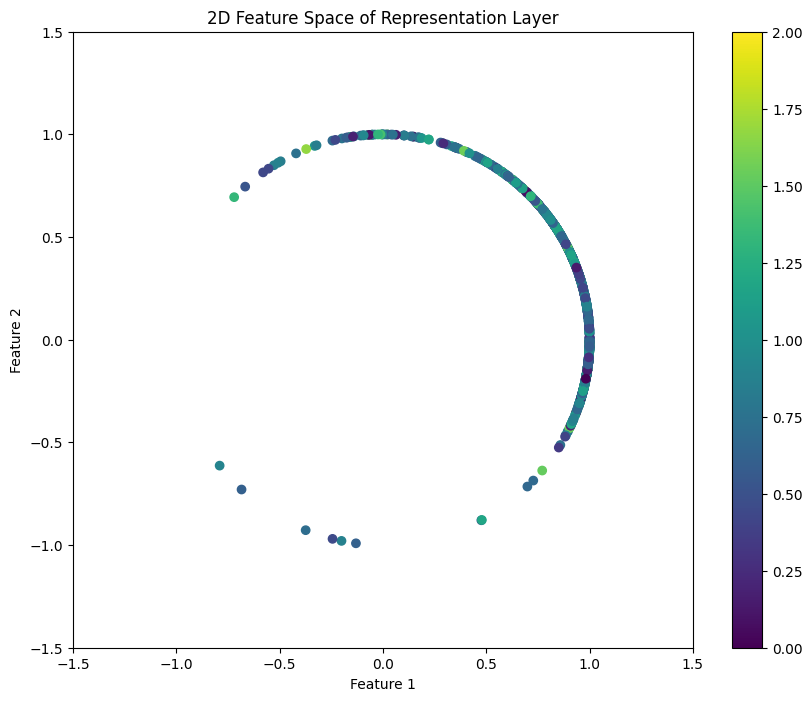

In [8]:
# Plot the 2D feature space
eva.plot_feature_space(model, loader.X_train, loader.y_train)
eva.plot_feature_space(model, loader.X_test, loader.y_test)

Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
44/44 [==============================] - 9s 183ms/step - loss: 0.1893 - val_loss: 0.1390
Epoch 2/400
44/44 [==============================] - 8s 177ms/step - loss: 0.1217 - val_loss: 0.1353
Epoch 3/400
44/44 [==============================] - 8s 173ms/step - loss: 0.1141 - val_loss: 0.1359
Epoch 4/400
44/44 [==============================] - 8s 174ms/step - loss: 0.1203 - val_loss: 0.1350
Epoch 5/400
44/44 [==============================] - 8s 171ms/step - loss: 0.1226 - val_loss: 0.1286
Epoch 6/400
44/44 [==============================] - 7s 163ms/step - loss: 0.1072 - val_loss: 0.1052
Epoch 7/400
44/44 [==============================] - 7s 170ms/step - loss: 0.0743 - val_loss: 0.0516
Epoch 8/400
44/44 [==============================] - 8s 174ms/step - loss: 0.0455 - val_loss: 0.0291
Epoch 9/400
44/44 [==============================] - 7s 163ms/step - loss: 0.0223 - val_loss: 0.0292
Epoch 10/400
44/44 [==================

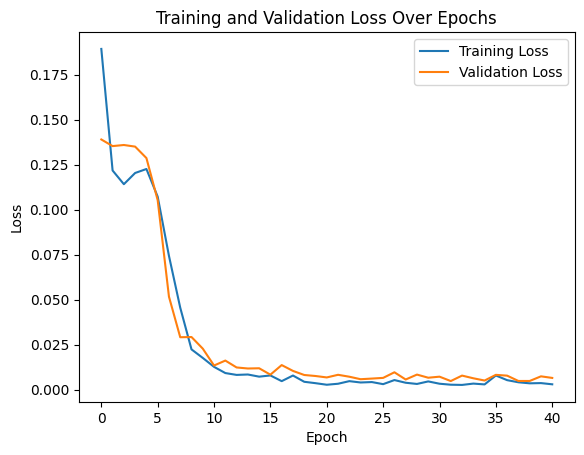

Epoch 1/32
63/63 [==============================] - 11s 149ms/step - loss: 0.0093
Epoch 2/32
63/63 [==============================] - 9s 147ms/step - loss: 0.0078
Epoch 3/32
63/63 [==============================] - 9s 149ms/step - loss: 0.0063
Epoch 4/32
63/63 [==============================] - 9s 147ms/step - loss: 0.0049
Epoch 5/32
63/63 [==============================] - 9s 149ms/step - loss: 0.0061
Epoch 6/32
63/63 [==============================] - 10s 151ms/step - loss: 0.0034
Epoch 7/32
63/63 [==============================] - 9s 151ms/step - loss: 0.0066
Epoch 8/32
63/63 [==============================] - 9s 147ms/step - loss: 0.0051
Epoch 9/32
63/63 [==============================] - 9s 148ms/step - loss: 0.0041
Epoch 10/32
63/63 [==============================] - 9s 151ms/step - loss: 0.0031
Epoch 11/32
63/63 [==============================] - 9s 150ms/step - loss: 0.0021
Epoch 12/32
63/63 [==============================] - 10s 153ms/step - loss: 0.0022
Epoch 13/32
63/63 [===

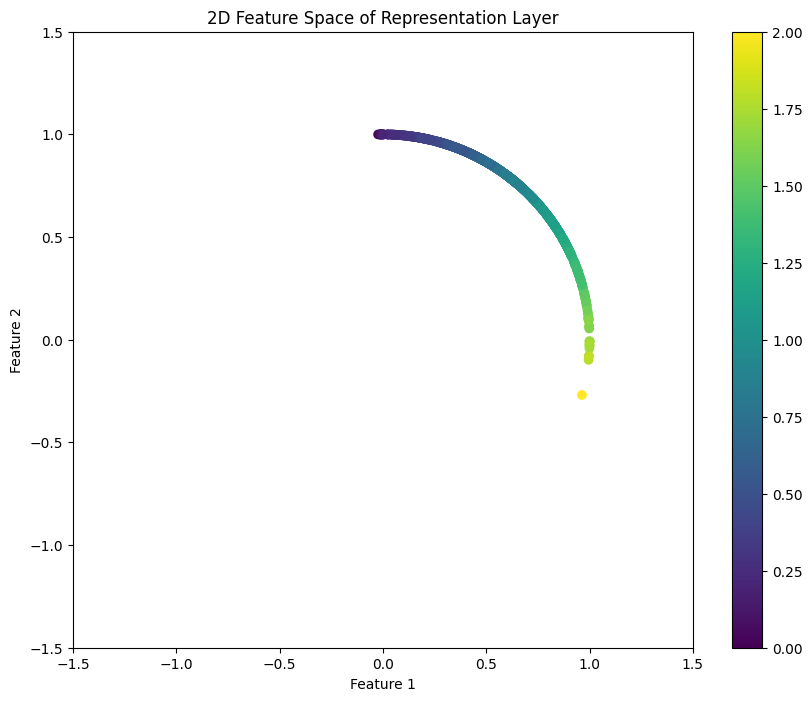

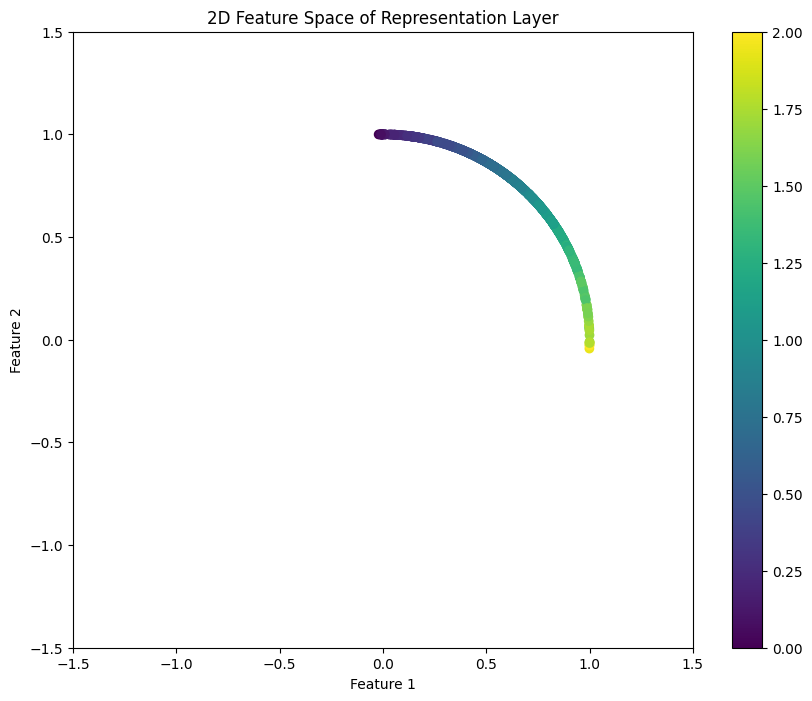

In [8]:
history = mb.train_features(model, loader.X_train, loader.y_train, learning_rate=1e-3, epochs=400, batch_size=16)

# plot_feature_space(model, X_train, y_train)
# Plot the 2D feature space
eva.plot_feature_space(model, loader.X_train, loader.y_train)
eva.plot_feature_space(model, loader.X_test, loader.y_test)


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 64)                320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 32)                0   

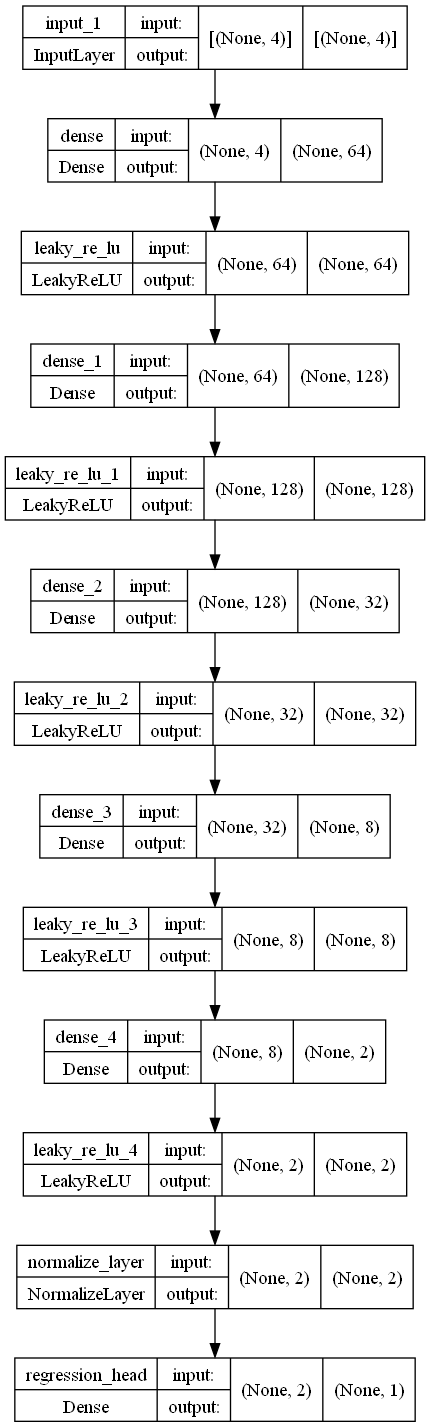

In [8]:
# add regression head
extended_model = mb.add_regression_head(model)
# summarize and plot the model
extended_model.summary()
# tf.keras.utils.plot_model(extended_model, show_shapes=True)

Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
44/44 [==============================] - 2s 20ms/step - loss: 0.4602 - regression_head_loss: 0.4602 - regression_head_mse: 0.4884 - val_loss: 0.3065 - val_regression_head_loss: 0.3065 - val_regression_head_mse: 0.3115
Epoch 2/400
44/44 [==============================] - 1s 12ms/step - loss: 0.2095 - regression_head_loss: 0.2095 - regression_head_mse: 0.2062 - val_loss: 0.1420 - val_regression_head_loss: 0.1420 - val_regression_head_mse: 0.1251
Epoch 3/400
44/44 [==============================] - 1s 20ms/step - loss: 0.1007 - regression_head_loss: 0.1007 - regression_head_mse: 0.0839 - val_loss: 0.0773 - val_regression_head_loss: 0.0773 - val_regression_head_mse: 0.0550
Epoch 4/400
44/44 [==============================] - 1s 12ms/step - loss: 0.0561 - regression_head_loss: 0.0561 - regression_head_mse: 0.0377 - val_loss: 0.0469 - val_regression_head_loss: 0.0469 - val_regression_head_mse: 0.0268
Epoch 5/400
44/44 [========

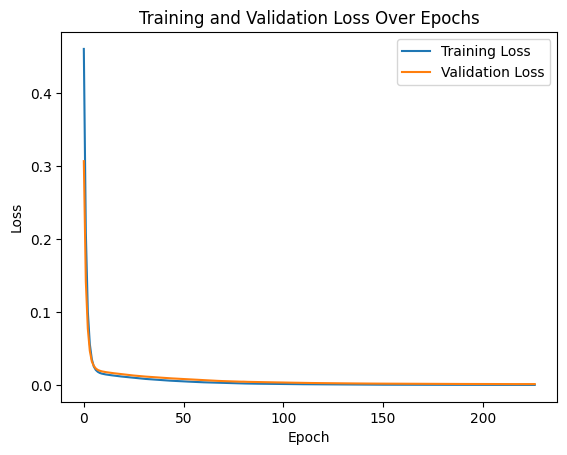

Epoch 1/218
63/63 [==============================] - 1s 7ms/step - loss: 5.6956e-04 - regression_head_loss: 5.6956e-04 - regression_head_mse: 2.4546e-04
Epoch 2/218
63/63 [==============================] - 0s 6ms/step - loss: 5.0512e-04 - regression_head_loss: 5.0512e-04 - regression_head_mse: 2.1539e-04
Epoch 3/218
63/63 [==============================] - 0s 5ms/step - loss: 4.5672e-04 - regression_head_loss: 4.5672e-04 - regression_head_mse: 1.9911e-04
Epoch 4/218
63/63 [==============================] - 0s 6ms/step - loss: 4.4014e-04 - regression_head_loss: 4.4014e-04 - regression_head_mse: 1.9679e-04
Epoch 5/218
63/63 [==============================] - 0s 5ms/step - loss: 4.2861e-04 - regression_head_loss: 4.2861e-04 - regression_head_mse: 2.0386e-04
Epoch 6/218
63/63 [==============================] - 0s 5ms/step - loss: 3.9701e-04 - regression_head_loss: 3.9701e-04 - regression_head_mse: 1.8616e-04
Epoch 7/218
63/63 [==============================] - 0s 5ms/step - loss: 3.7646e-0

In [9]:
# train now with the regression stage with balanced loss
history = mb.train_regression(extended_model, loader.X_train, loader.y_train, loader.reweights, learning_rate=1e-4,
                              epochs=400, batch_size=16)

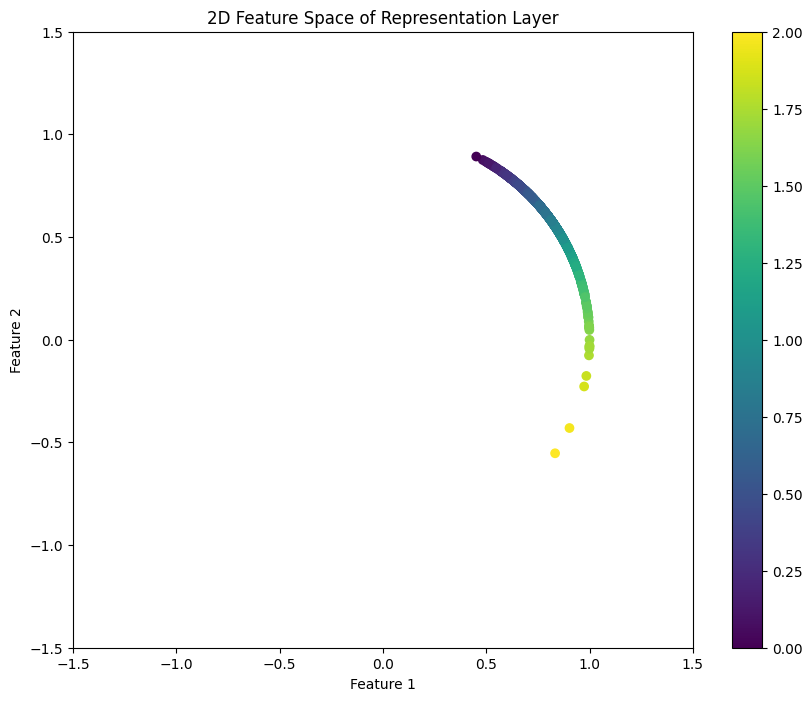

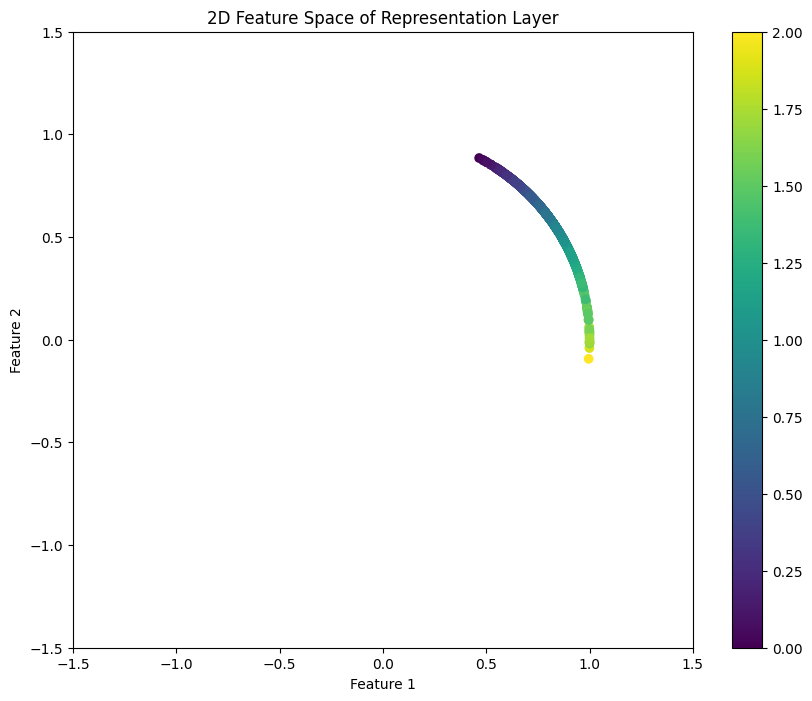

In [10]:
# plot_feature_space(model, X_train, y_train)
# Plot the 2D feature space
eva.plot_feature_space(extended_model, loader.X_train, loader.y_train, withhead=True)
eva.plot_feature_space(extended_model, loader.X_test, loader.y_test, withhead=True)

In [ ]:
eva.evaluate(extended_model, loader.X_train, loader.y_train)

Mean Squared Error: 0.0004578082007355988
Root Mean Squared Error: 0.02139645256102085


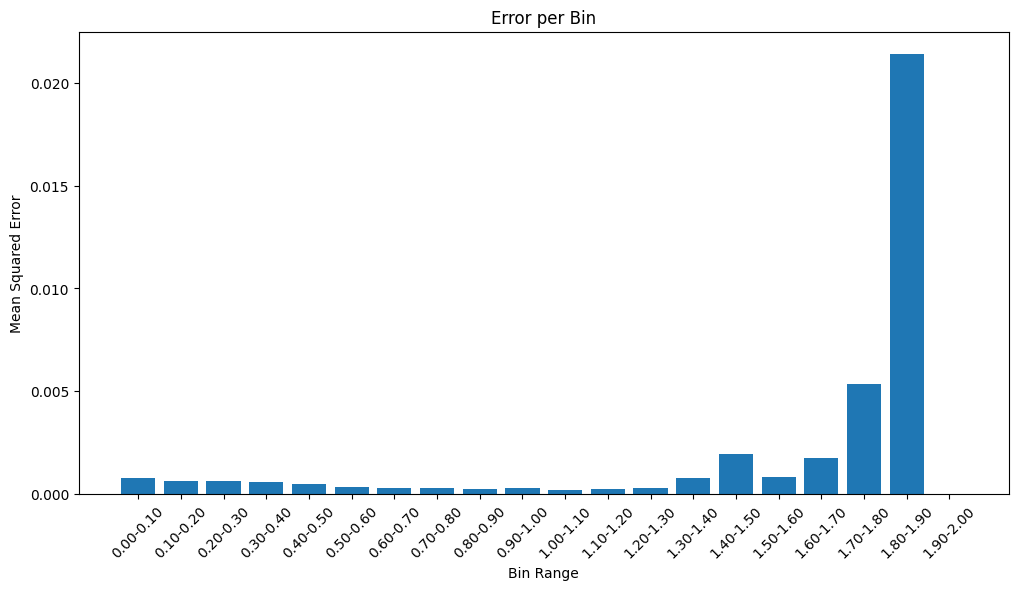

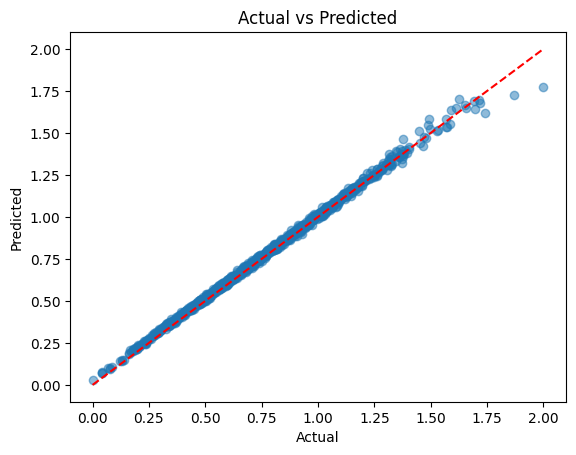

Sample with y = 1.3781939245040011 belongs to bin 14 and has an error of 0.08386259309701205
Sample with y = 1.4914006289943011 belongs to bin 15 and has an error of 0.09252247243086975
Sample with y = 1.739975615093097 belongs to bin 18 and has an error of 0.1185918288916199
Sample with y = 1.870703853135541 belongs to bin 19 and has an error of 0.14640132284684482
Sample with y = 2.0 belongs to bin 21 and has an error of 0.22859013080596924


0.0004578082

In [11]:
eva.evaluate(extended_model, loader.X_test, loader.y_test)

rRT

Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/15
47/47 [==============================] - 2s 9ms/step - loss: 0.8296 - regression_head_loss: 0.8296 - val_loss: 0.6284 - val_regression_head_loss: 0.6284
Epoch 2/15
47/47 [==============================] - 0s 6ms/step - loss: 0.4704 - regression_head_loss: 0.4704 - val_loss: 0.4570 - val_regression_head_loss: 0.4570
Epoch 3/15
47/47 [==============================] - 0s 7ms/step - loss: 0.3414 - regression_head_loss: 0.3414 - val_loss: 0.3310 - val_regression_head_loss: 0.3310
Epoch 4/15
47/47 [==============================] - 0s 6ms/step - loss: 0.2492 - regression_head_loss: 0.2492 - val_loss: 0.2358 - val_regression_head_loss: 0.2358
Epoch 5/15
47/47 [==============================] - 0s 6ms/step - loss: 0.1871 - regression_head_loss: 0.1871 - val_loss: 0.1554 - val_regression_head_loss: 0.1554
Epoch 6/15
47/47 [==============================] - 0s 7ms/step - loss: 0.1463 - regression_head_loss: 0.1463 - val_loss: 0.126

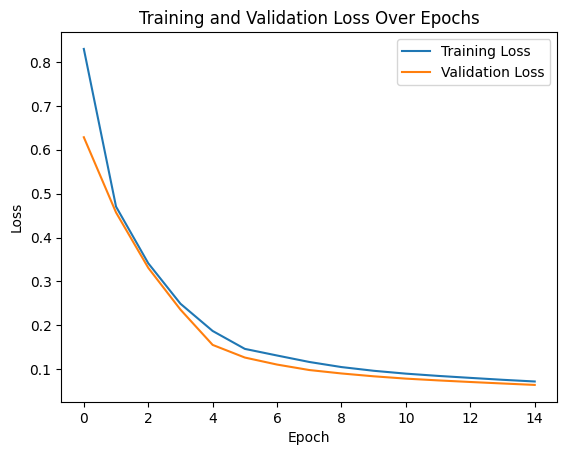

Epoch 1/15
63/63 [==============================] - 0s 7ms/step - loss: 0.0669 - regression_head_loss: 0.0669
Epoch 2/15
63/63 [==============================] - 0s 7ms/step - loss: 0.0634 - regression_head_loss: 0.0634
Epoch 3/15
63/63 [==============================] - 0s 6ms/step - loss: 0.0605 - regression_head_loss: 0.0605
Epoch 4/15
63/63 [==============================] - 0s 6ms/step - loss: 0.0577 - regression_head_loss: 0.0577
Epoch 5/15
63/63 [==============================] - 0s 7ms/step - loss: 0.0553 - regression_head_loss: 0.0553
Epoch 6/15
63/63 [==============================] - 1s 8ms/step - loss: 0.0531 - regression_head_loss: 0.0531
Epoch 7/15
63/63 [==============================] - 0s 6ms/step - loss: 0.0513 - regression_head_loss: 0.0513
Epoch 8/15
63/63 [==============================] - 0s 7ms/step - loss: 0.0496 - regression_head_loss: 0.0496
Epoch 9/15
63/63 [==============================] - 0s 6ms/step - loss: 0.0481 - regression_head_loss: 0.0481
Epoch 10/1

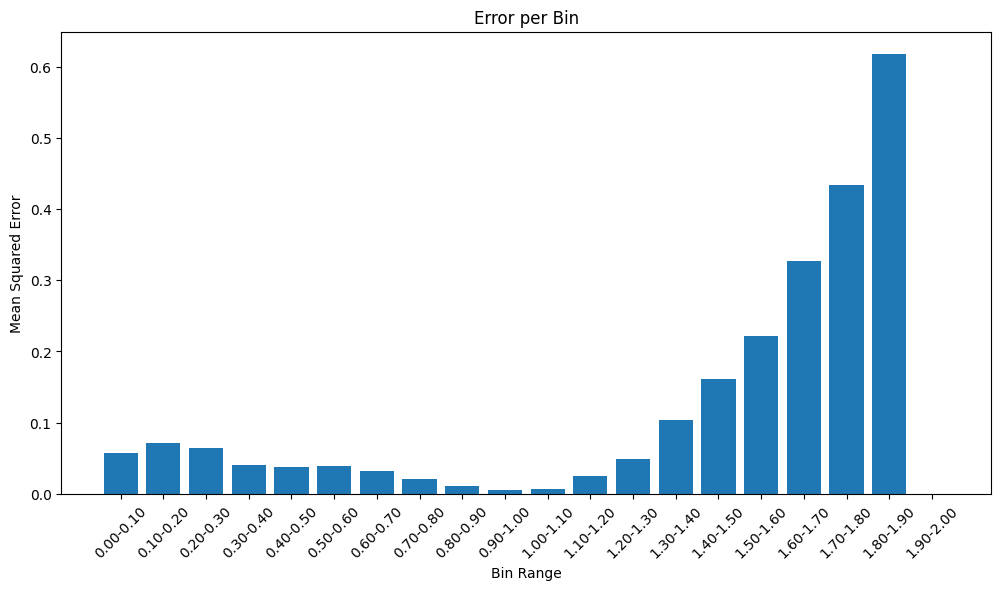

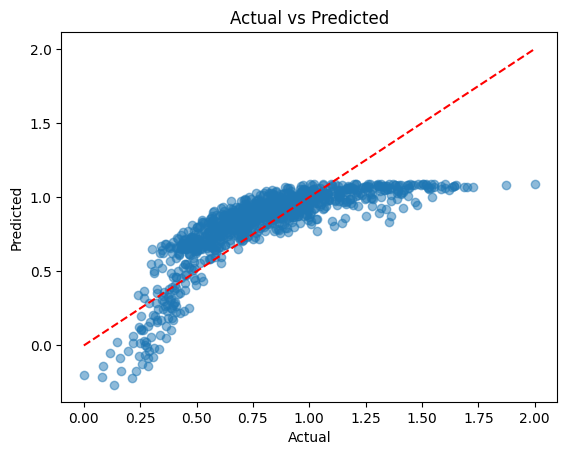

Sample with y = 1.6867952583215642 belongs to bin 17 and has an error of 0.6169135806940007
Sample with y = 1.699467012181184 belongs to bin 17 and has an error of 0.6277045695923777
Sample with y = 1.7276035706731971 belongs to bin 18 and has an error of 0.6585958163473304
Sample with y = 1.8720391717495213 belongs to bin 19 and has an error of 0.786405059391428
Sample with y = 2.0 belongs to bin 21 and has an error of 0.9131042957305908


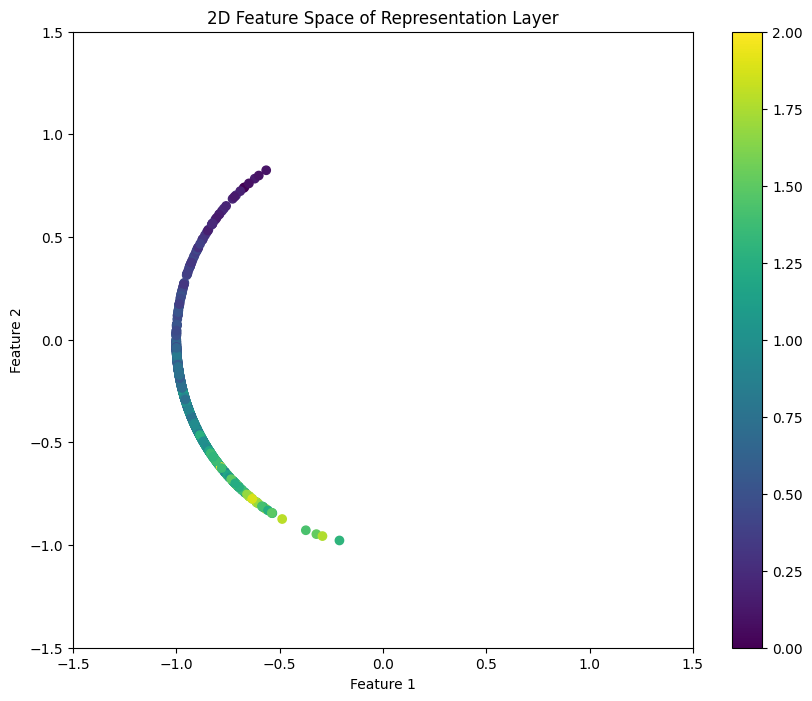

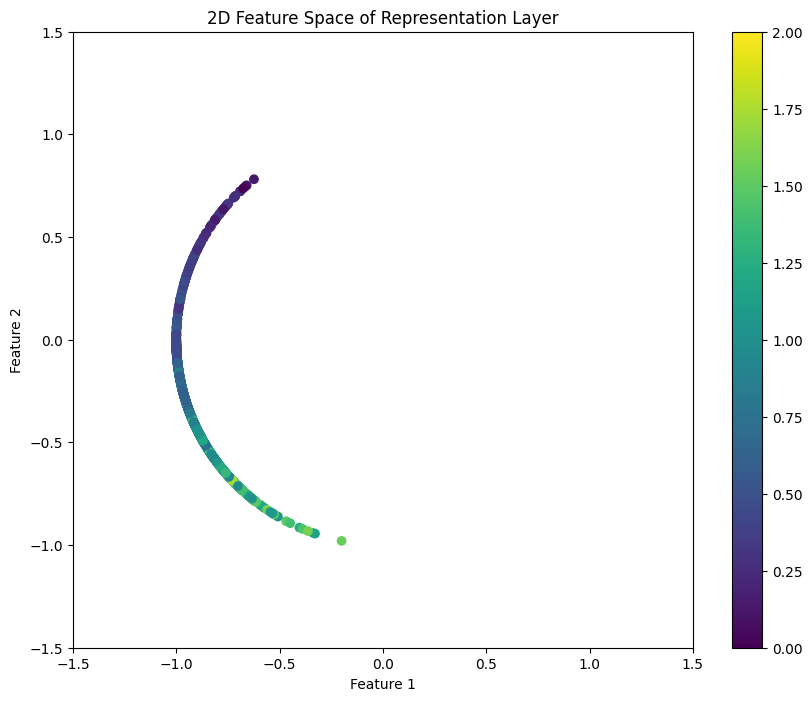

AssertionError: 

In [2]:
# Generate synthetic data
n_train = 1000
n_test = 1000
loader = dg(n_train, n_test)

mb = mbuilder()

eva = ev()
# Create and train the model
hiddens = [64, 32, 8]
model = mb.create_model_feat(4, 2, hiddens)
# summarize and plot the model
# model.summary()
# plot_feature_space(model, X_train, y_train)
# Plot the 2D feature space
# eva.plot_feature_space(model, loader.X_train, loader.y_train)
# eva.plot_feature_space(model, loader.X_test, loader.y_test)
# add regression head
extended_model = mb.add_regression_head(model)
# train now with the regression stage with balanced loss
history = mb.train_regression(
    extended_model, 
    loader.X_train, 
    loader.y_train, 
    loader.X_val,
    loader.y_val,
    learning_rate=1e-4,
    epochs=15, batch_size=16)
# get the val mse
val_mse = eva.evaluate(extended_model, loader.X_test, loader.y_test)
# plots the feature space 
# Plot the 2D feature space
eva.plot_feature_space(extended_model, loader.X_train, loader.y_train, withhead=True)
eva.plot_feature_space(extended_model, loader.X_test, loader.y_test, withhead=True)
# reset regression head
base_model = mb.reset_regression_head(extended_model)
# add new regression head
extended_model2 = mb.add_regression_head(base_model)
# freeze the features
mb.freeze_features(extended_model2)
# train the new head with balanced loss
history = mb.train_regression(
    extended_model2, 
    loader.X_train, 
    loader.y_train, 
    loader.X_val,
    loader.y_val,
    loader.reweights, 
    loader.val_reweights,
    learning_rate=1e-4,
    epochs=15, batch_size=16)
# get the val mse
val_mse = eva.evaluate(extended_model2, loader.X_test, loader.y_test)

rRT + AE

In [ ]:
# Generate synthetic data
n_train = 1000
n_test = 1000
loader = dg(n_train, n_test)

mb = mbuilder()

eva = ev()
# Create and train the model
hiddens = [64, 32, 8]
model = mb.create_model_feat(4, 2, hiddens)
# summarize and plot the model
# model.summary()
# plot_feature_space(model, X_train, y_train)
# Plot the 2D feature space
# eva.plot_feature_space(model, loader.X_train, loader.y_train)
# eva.plot_feature_space(model, loader.X_test, loader.y_test)
# add regression head
extended_model = mb.add_regression_head(model)
# train now with the regression stage with balanced loss
history = mb.train_regression(
    extended_model, 
    loader.X_train, 
    loader.y_train, 
    loader.X_val,
    loader.y_val,
    learning_rate=1e-4,
    epochs=150, batch_size=16)
# get the val mse
val_mse = eva.evaluate(extended_model, loader.X_test, loader.y_test)
# plots the feature space 
# Plot the 2D feature space
eva.plot_feature_space(extended_model, loader.X_train, loader.y_train, withhead=True)
eva.plot_feature_space(extended_model, loader.X_test, loader.y_test, withhead=True)
# reset regression head
base_model = mb.reset_regression_head(extended_model)
# add new regression head
extended_model2 = mb.add_regression_head(base_model)
# freeze the features
mb.freeze_features(extended_model2)
# train the new head with balanced loss
history = mb.train_regression(
    extended_model2, 
    loader.X_train, 
    loader.y_train, 
    loader.X_val,
    loader.y_val,
    loader.reweights, 
    loader.val_reweights,
    learning_rate=1e-4,
    epochs=150, batch_size=16)
# get the val mse
val_mse = eva.evaluate(extended_model2, loader.X_test, loader.y_test)

In [ ]:
# option 3 single stage training  training

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_5 (Dense)             (None, 64)                320       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 32)                0   

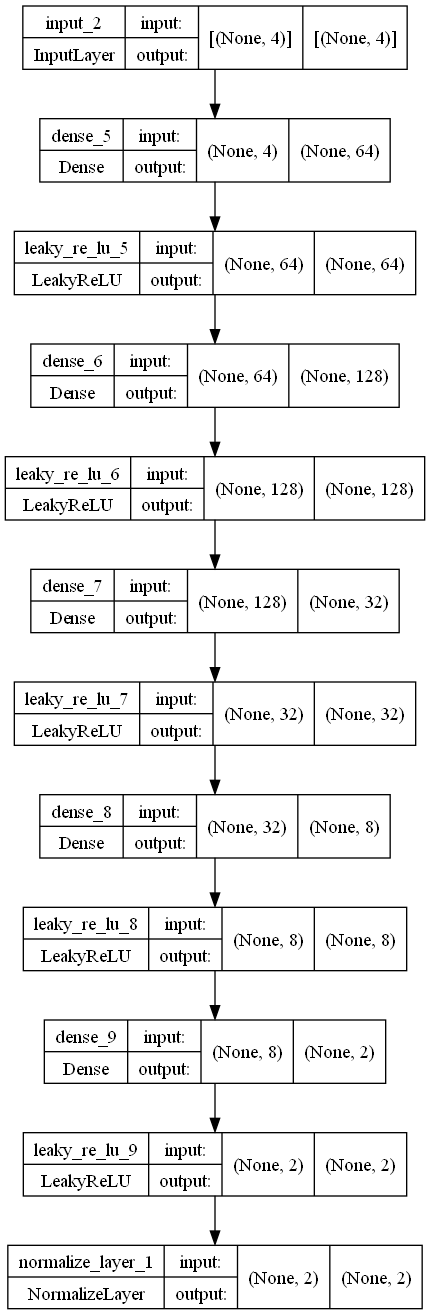

In [9]:
# Create and train the model
hiddens = [64, 128, 32, 8]
model2 = mb.create_model_feat(4, 2, hiddens)
# summarize and plot the model
model2.summary()
tf.keras.utils.plot_model(model2, show_shapes=True)

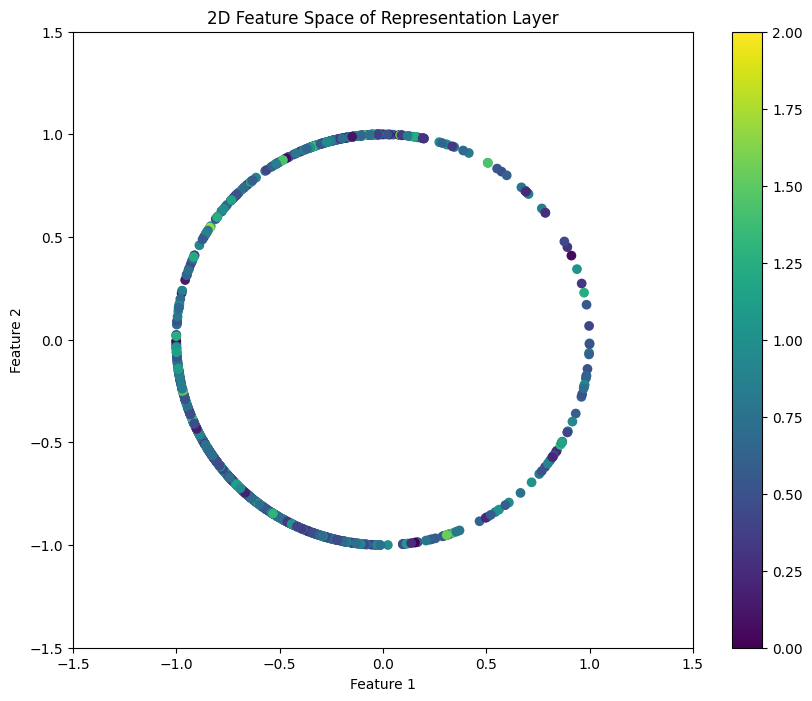

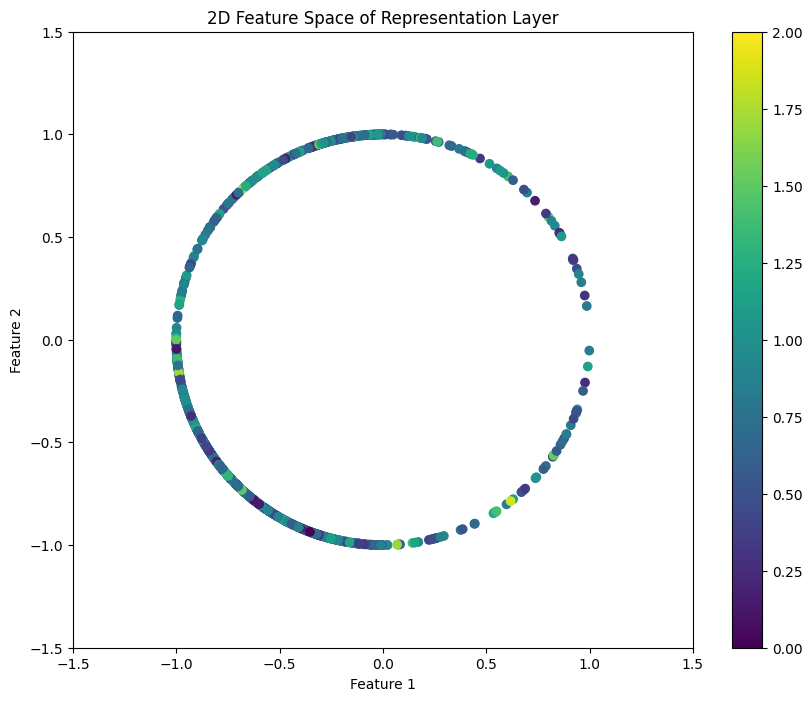

In [10]:
# Plot the 2D feature space
eva.plot_feature_space(model2, loader.X_train, loader.y_train)
eva.plot_feature_space(model2, loader.X_test, loader.y_test)

Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
44/44 [==============================] - 33s 707ms/step - loss: 0.2947 - val_loss: 0.1447
Epoch 2/400
44/44 [==============================] - 30s 692ms/step - loss: 0.1182 - val_loss: 0.1370
Epoch 3/400
44/44 [==============================] - 29s 669ms/step - loss: 0.1120 - val_loss: 0.1358
Epoch 4/400
44/44 [==============================] - 29s 660ms/step - loss: 0.1074 - val_loss: 0.1323
Epoch 5/400
44/44 [==============================] - 29s 665ms/step - loss: 0.1078 - val_loss: 0.1326
Epoch 6/400
44/44 [==============================] - 30s 672ms/step - loss: 0.0968 - val_loss: 0.1318
Epoch 7/400
44/44 [==============================] - 30s 681ms/step - loss: 0.1094 - val_loss: 0.1321
Epoch 8/400
44/44 [==============================] - 31s 714ms/step - loss: 0.1083 - val_loss: 0.1306
Epoch 9/400
44/44 [==============================] - 31s 709ms/step - loss: 0.1014 - val_loss: 0.1332
Epoch 10/400
44/44 [=========

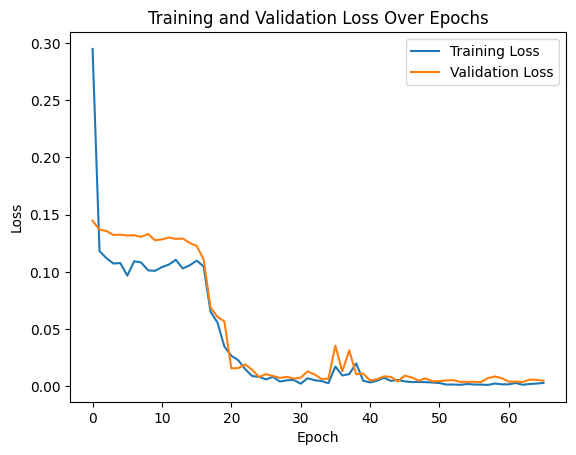

Epoch 1/57
63/63 [==============================] - 46s 714ms/step - loss: 0.0103
Epoch 2/57
63/63 [==============================] - 43s 680ms/step - loss: 0.0042
Epoch 3/57
63/63 [==============================] - 46s 723ms/step - loss: 0.0043
Epoch 4/57
63/63 [==============================] - 43s 683ms/step - loss: 0.0055
Epoch 5/57
63/63 [==============================] - 43s 689ms/step - loss: 0.0052
Epoch 6/57
63/63 [==============================] - 43s 685ms/step - loss: 0.0069
Epoch 7/57
63/63 [==============================] - 43s 684ms/step - loss: 0.0050
Epoch 8/57
63/63 [==============================] - 43s 682ms/step - loss: 0.0022
Epoch 9/57
63/63 [==============================] - 43s 685ms/step - loss: 0.0149
Epoch 10/57
63/63 [==============================] - 43s 683ms/step - loss: 0.0124
Epoch 11/57
63/63 [==============================] - 48s 762ms/step - loss: 0.0040
Epoch 12/57
63/63 [==============================] - 44s 704ms/step - loss: 0.0024
Epoch 13/57
6

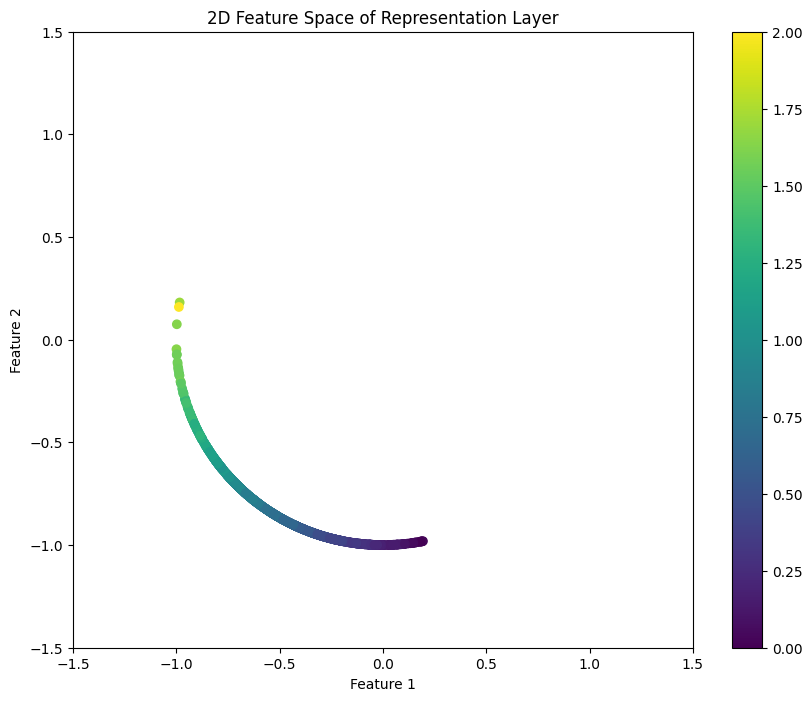

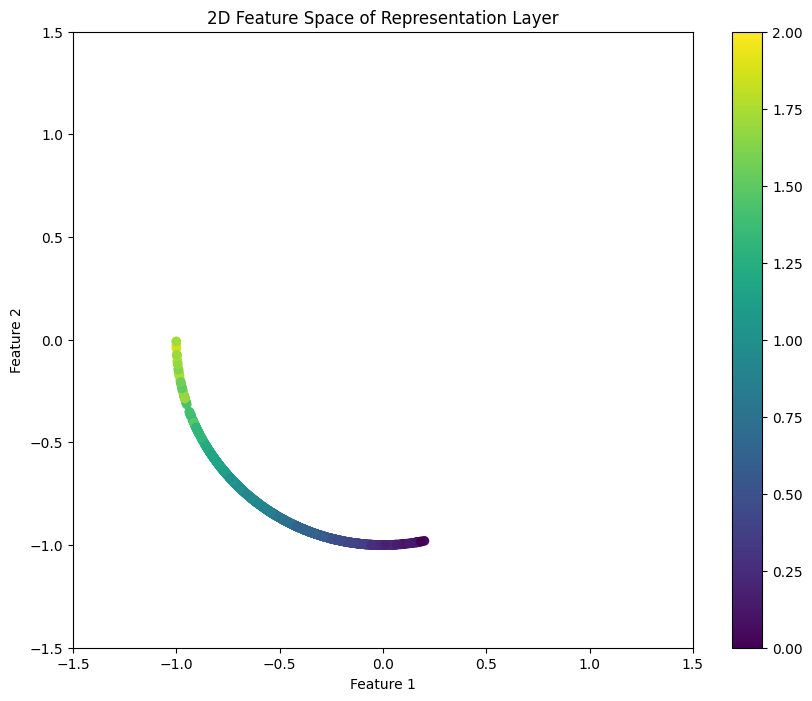

In [11]:
history = mb.train_features(model2, loader.X_train, loader.y_train, sample_joint_weights=loader.jreweights,
                            learning_rate=1e-3, epochs=400, batch_size=16)

# plot_feature_space(model, X_train, y_train)
# Plot the 2D feature space
eva.plot_feature_space(model2, loader.X_train, loader.y_train)
eva.plot_feature_space(model2, loader.X_test, loader.y_test)

In [ ]:
history = mb.train_features(model2, loader.X_train, loader.y_train, sample_joint_weights=loader.jreweights,
                            learning_rate=1e-3, epochs=400, batch_size=16)